# R语言PCA分析教程 Principal Component Methods in R  
主成分分析Principal Component Methods（PCA）允许我们总结和可视化包含由多个相互关联的定量变量描述的个体/观察的数据集中的信息。每个变量都可以视为不同的维度。如果数据集中包含3个以上的变量，那么可视化多维超空间可能非常困难。  
主成分分析用于从多变量数据表中提取重要信息，并将此信息表示为一组称为主成分的新变量。这些新变量对应于原件的线性组合。主成分的数量小于或等于原始变量的数量。PCA的目标是识别数据变化最大的方向（或主成分）。换句话说，PCA将多变量数据的维度降低到两个或三个主要成分，这些成分可以图形化可视化，同时信息损失最小。PCA属于机器学习降维方法质之一，但是仅仅对线性数据有用，非线性数据建议使用TSNE。  
本文描述了PCA的基本概念，并演示了如何使用R软件计算和可视化PCA。此外，我们将展示如何揭示解释数据集变化的最重要变量。主要内容如下：
1. 基础
2. 计算
3. 实例
4. 总结

## 1. 基础  
+ 基础概念  
+ 计算过程  

### 1.1 基础概念

了解PCA的细节需要线性代数的知识。在这里，我们将仅通过简单的数据图形表示来解释基础知识。
在下图1A中，数据在XY坐标系中表示。通过识别数据变化的主要方向（称为主成分）来实现降维。PCA假设方差最大的方向是最“重要的”（即最主要的方向）。
在下图1A中，PC1轴是样本显示最大变化的第一个主方向。PC2轴是第二个最重要的方向，它与PC1轴正交。通过将每个样本投影到第一个主成分上，我们的二维数据的维数可以减少到一个维度（图1B）。  
![1A](https://gitee.com/luminious/article_picture_warehouse/raw/master/R-Study-Notes/Principal%20Component%20Methods%20in%20R/1A.png)
![1B](https://gitee.com/luminious/article_picture_warehouse/raw/master/R-Study-Notes/Principal%20Component%20Methods%20in%20R/1B.png)
从技术上讲，每个主成分保留的方差量是通过所谓的特征值来测量的。请注意，当数据集中的变量高度相关时，PCA方法特别有用。相关性表明数据存在冗余。由于这种冗余，PCA可用于将原始变量减少为较少数量的新变量（= 主成分），解释原始变量的大部分方差。
![2A](https://gitee.com/luminious/article_picture_warehouse/raw/master/R-Study-Notes/Principal%20Component%20Methods%20in%20R/2A.png)
![2B](https://gitee.com/luminious/article_picture_warehouse/raw/master/R-Study-Notes/Principal%20Component%20Methods%20in%20R/2B.png)
总的来说，主成分分析的主要目的是：

+ 识别数据集中的隐藏模式；
+ 通过消除数据中的噪声和冗余来降低数据的维度；
+ 识别相关变量。



### 1.2 计算过程  
目前很多书籍讲PCA并不那么通俗易懂。PCA是用来降低数据维度的，维度降低后的主成分和原来的变量不是一个东西。如果想获得原来数据中重要的变量，删除无关变量，请参考特征工程。PCA计算过程很简单，具体如下：

**（1）数据处理**  
假设我们有这样的2维数据：
![png](https://gitee.com/luminious/article_picture_warehouse/raw/master/R-Study-Notes/Principal%20Component%20Methods%20in%20R/3.1.png)  
其中行代表了样例，列代表特征，这里有10个样例可以认为有10辆汽车，x是千米/小时的速度，y是英里/小时的速度。

通常x,y都是不同的变量，如果要放到一起来比较，一般都要进行数据标准化使得各个变量数据能够放到一块比较。这里简单一点，只减去平均值。分别求x和y的平均值，然后对于所有的样例，都减去对应的均值。这里x的均值是1.81，y的均值是1.91，那么一个样例减去均值后即为（0.69,0.49），得到
![png](https://gitee.com/luminious/article_picture_warehouse/raw/master/R-Study-Notes/Principal%20Component%20Methods%20in%20R/3.2.png) 

**(2) 计算特征值**  
在现实情况下，我们需要通过计算数值矩阵的相关系数矩阵或者协方差矩阵来求得特征值和特征向量，进而获得主要成分。相关系数矩阵和协方差矩阵能够变量间相关性，主成分分析会删除和其他变量相关性强的变量，留下更具有代表性的变量。相关系数矩阵相当于消除量纲的表示变量间相关性的一个矩阵，协方差系数矩阵是没有消除量纲的表示变量间相关性的矩阵。相关系数矩阵是协方差系数矩阵的特例，通常在PCA中，如果数据量很少用相关系数矩阵，很多用协方差系数矩阵。  
这里主要计算协方差系数矩阵，因为协方差系数更具有实际代表意义。主要计算过程网上都有。那么我们能够获得矩阵的特征值和特征向量（这部分是线性代数的内容)。如下所示：
![png](https://gitee.com/luminious/article_picture_warehouse/raw/master/R-Study-Notes/Principal%20Component%20Methods%20in%20R/3.3.png)
这里特征值0.049对应特征向量为$（-0.735,0.677)^T$;特征值1.284对应特征向量为$（-0.677,-0.735)^T$。 

主成分分析降维的意思就是根据特征值的大小挑选主成分变量，比如这里我们要把二维数据降为一维，就选取最大特征值1.284对应的特征向量计算主成分得分。计算公式如下：   
$PC1= DataAdjust×特征向量(-0.677, -0.735)^T$   
PC1就是我们说的主成分得分，特征向量(-0.677, -0.735)就是我们说得主成分系数。我们所获得降维后的一维变量就是通过这个公式对每行数据通过上面公式获得的。结果如下：
![png](https://gitee.com/luminious/article_picture_warehouse/raw/master/R-Study-Notes/Principal%20Component%20Methods%20in%20R/3.4.png)

**(3) 可视化描述**  
上述过程可以简单用图来描述，我们有一个经过归一化的数据，这个数据各个样本点都是分散的，无规律的。
![png](https://gitee.com/luminious/article_picture_warehouse/raw/master/R-Study-Notes/Principal%20Component%20Methods%20in%20R/3.5.png)
如果我们将原数据降为二维（这里实际维度没有变化，一维不好表示）。那么结果如下：
![png](https://gitee.com/luminious/article_picture_warehouse/raw/master/R-Study-Notes/Principal%20Component%20Methods%20in%20R/3.6.png)
可以看到现在各个样本点分布像一条直线，与x轴平行。样本点的x坐标就是第一主成分，第二主成分就是y坐标。
其中贡献率是表示投影后信息的保留程度的变量，计算公式就是前K个特征值除以总的特征值之和。计算公公式如下：
$$
\frac{\sum_{i=0}^{K} \lambda_{i}}{\sum_{i=0}^{m} \lambda_{i}}
$$
比如本文例子有两个特征值1.284和0.049，如果我们降为一维主成分，那么第一主成分贡献率为$1.284/(1.284+0.049)=0.963$。

PCA详细原理说明见：https://blog.csdn.net/LuohenYJ/article/details/78355954

## 2. 计算
+ R包
+ R代码

### 2.1 R包
用于计算PCA 的R软件中提供了来自不同软件包的多个函数：
+ prcomp()和princomp() [内置]，
+ PCA() [ FactoMineR包]，
+ dudi.pca() [ ade4包]，
+ epPCA() [ ExPosition包]  

无论您决定使用什么功能，您都可以使用factoextraR包中提供的R功能轻松提取和可视化PCA的结果。
通过install.packages("FactoMineR", "factoextra")安装所使用的包。

In [1]:
# 调用R包
library("FactoMineR");
library("factoextra");

Warning message:
"package 'FactoMineR' was built under R version 3.6.1"Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


我们将使用演示数据集decathlon2从factoextra包，数据集如下：

In [2]:
data(decathlon2)
head(decathlon2)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.1,8,7995,Decastar


但我们只选择部分数据进行计算，处理如下：

In [3]:
decathlon2.active <- decathlon2[1:23, 1:10]
head(decathlon2.active[, 1:6], 4)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69
CLAY,10.76,7.40,14.26,1.86,49.37,14.05
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31


在主成分分析中，变量通常被缩放（即标准化）。当变量以不同的尺度（例如：千克，千米，厘米......）测量时，尤其建议这样做; 否则，获得的PCA输出将受到严重影响。目标是使变量具有可比性。通常，变量被缩放为具有标准偏差1和平均值为零。数据标准化是在PCA和聚类分析之前广泛用于基因表达数据分析的方法。当变量的平均值和/或标准偏差大不相同时，我们可能还希望缩放数据。缩放变量时，数据转换公式如下：
$$
\frac{x_{i}-\operatorname{mean}(x)}{s d(x)}
$$
这种方法是计算相关系数矩阵，默认是计算相关系数矩阵而不是协方差系数矩阵。请注意，默认情况下在FactoMineR 中，PCA之前会自动标准化数据; 所以你不需要在PCA之前进行这种转换。

### 2.2 R代码  
本部分主要介绍R语言FactoMineR进行PCA的常用代码，具体实例见下一章。

**PCA(X, scale.unit = TRUE, ncp = 5, graph = TRUE)**
+ X：数据框。行是个体，列是数字变量
+ scale.unit：一个逻辑值。如果为TRUE，则在分析之前将数据缩放为单位方差。这种相同规模的标准化避免了一些变量因其较大的测量单位而成为主导。它使变量具有可比性。
+ ncp：最终结果中保留的维数。
+ graph：一个逻辑值。如果为TRUE，则显示图表。

我们将使用factoextra R包来帮助解释PCA。无论你决定使用什么函数，你都可以轻松地提取和可视化PCA的结果使用factoextra R包中提供的R函数。这些功能包括：
+ **get_eigenvalue(res.pca)**：提取主成分的特征值/方差
+ **fviz_eig(res.pca)**：可视化特征值
+ **get_pca_ind(res.pca)**，get_pca_var(res.pca)：分别提取个体和变量的结果。
+ **fviz_pca_ind(res.pca)**，fviz_pca_var(res.pca)：分别可视化结果个体和变量。
+ **fviz_pca_biplot(res.pca)**：制作主成分分析散点图biplot图。

我们检查特征值以确定考虑的主成分的数量。可以使用函数get_eigenvalue提取主成分保留的特征值和方差（即信息）的比例。  
**eig.val <- get_eigenvalue(res.pca)**   
**eig.val**    
一般打印结果如下：
```
##        eigenvalue variance.percent cumulative.variance.percent
## Dim.1       4.124            41.24                        41.2
## Dim.2       1.839            18.39                        59.6
## Dim.3       1.239            12.39                        72.0
## Dim.4       0.819             8.19                        80.2
## Dim.5       0.702             7.02                        87.2
## Dim.6       0.423             4.23                        91.5
## Dim.7       0.303             3.03                        94.5
## Dim.8       0.274             2.74                        97.2
## Dim.9       0.155             1.55                        98.8
## Dim.10      0.122             1.22                       100.0
```
每个特征值解释的变化比例在第二列中给出。例如，4.124除以10等于0.4124，或者，通过该第一特征值解释约41.24％的变化。解释的累积百分比是通过将所解释的变化的连续比例相加以获得运行总计来获得的。例如，41.242％加上18.385％等于59.627％，依此类推。因此，大约59.627％的变化由前两个特征值一起解释

可以使用函数**fviz_eig()**或**fviz_screeplot()** 生成scree图。结果如下：
![4](https://gitee.com/luminious/article_picture_warehouse/raw/master/R-Study-Notes/Principal%20Component%20Methods%20in%20R/4.png)
scree图能够表示各个主成分贡献率，进而决定选择多少主成分。目前没有广为接受的客观方法来决定有多少主成分就足够了，这取决于具体的应用领域和具体的数据集。通过可以将主成分数量限制为占总方差的比例。例如上图，数据中包含的87％的信息（差异）由前五个主要组成部分保留，我们就选择前五个主成分。

## 3. 实例  
+ 变量分析
+ 观测值分析
+ 图表定制

### 3.1  变量分析  
变量也就是样本的属性，在R语言中每列就是样本集的单个属性值。

#### 3.1.1 变量基础作图

In [4]:
# 获得数据
library("FactoMineR")
library("factoextra")
data(decathlon2)
decathlon2.active <- decathlon2[1:23, 1:10]

In [5]:
# PCA计算
res.pca <- PCA(decathlon2.active, graph = FALSE)
# 提取变量的分析结果
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

factoextra包自带了提取变量的分析结果get_pca_var函数，其中：
+ coord表示用于创建散点图的变量坐标。coord实际上就是成分载荷，指观测变量与主成分的相关系数
+ cor表示相关系数
+ cos2表示因子质量，var.cos2 = var.coord * var.coord
+ contrib表示包含变量对主成分的贡献(百分比)

接下来我们将介绍如何可视化这些变量并得出有关其相关性的结论。

**相关曲线作图**  
一个变量和一个主成分之间的关系的代表着在PC坐标系里面该变量的坐标，对变量作图我们可以用fviz_pca_var函数。  
这张图也可以称为变量相关图，它展示了变量组内包括和主成分之间的关系，正相关的变量是彼此靠近的，负相关的变量师南辕北辙的，而从中心点到变量的长度则代表着变量在这个维度所占的比例（也可以理解为质量，quality）。这个图根据coord获得。

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,-0.8506257,-0.17939806,0.3015564,0.0335732,-0.1944440
Long.jump,0.7941806,0.28085695,-0.1905465,-0.1153896,0.2331567
Shot.put,0.7339127,0.08540412,0.5175978,0.1284684,-0.2488129
High.jump,0.6100840,-0.46521415,0.3300852,0.1445501,0.4027002


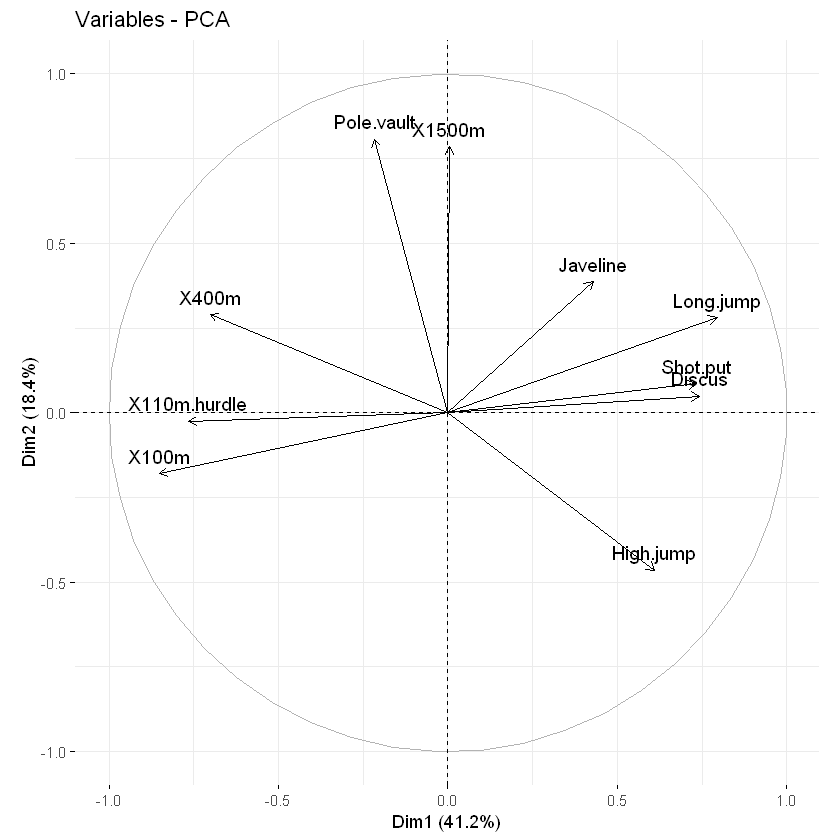

In [6]:
# Coordinates of variables
head(var$coord, 4)
# col.var设定线条颜色
fviz_pca_var(res.pca, col.var = "black")

**代表质量作图**  
变量在PCA结果里面的质量（quality）称为cos2，可以使用corrplot包在所有维度上可视化变量的cos2。 或者使用factoextra包的fviz_cos2()可视化，只是显示效果相比前种方法弱。

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,0.7235641,0.0321836641,0.09093628,0.0011271597,0.03780845
Long.jump,0.6307229,0.0788806285,0.03630798,0.0133147506,0.05436203
Shot.put,0.5386279,0.0072938636,0.26790749,0.0165041211,0.06190783
High.jump,0.3722025,0.2164242070,0.10895622,0.0208947375,0.16216747
X400m,0.4922473,0.0842034209,0.08039091,0.1856106269,0.01079698
X110m.hurdle,0.5838873,0.0006121077,0.20149984,0.0002854712,0.05027463


corrplot 0.84 loaded


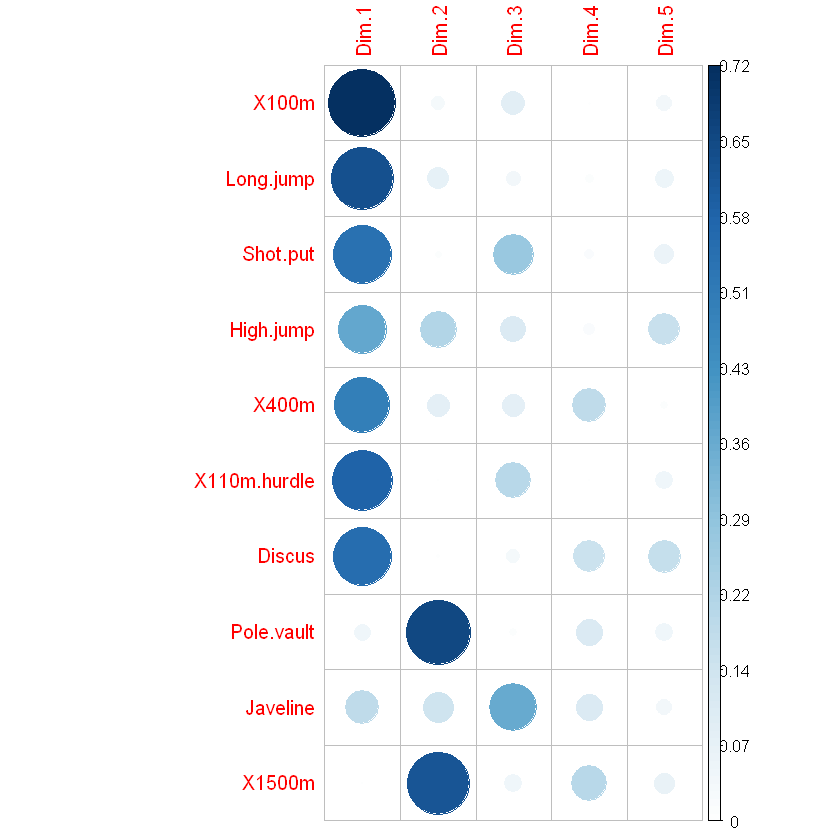

In [7]:
head(var$cos2)
library("corrplot")
# is.corr表示输入的矩阵不是相关系数矩阵
corrplot(var$cos2, is.corr=FALSE)

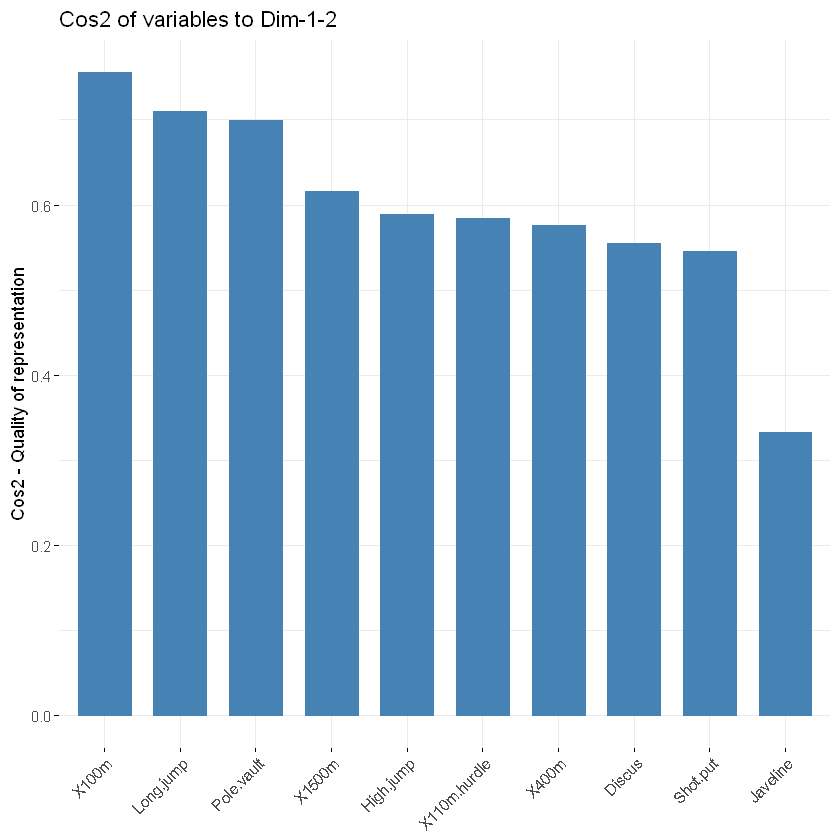

In [8]:
# Total cos2 of variables on Dim.1 and Dim.2
# 在第一第二主成分是显示结果（通过值的叠加显示）
fviz_cos2(res.pca, choice = "var", axes = 1:2)

+ 一个较高的cos2值代表着这个变量对该主成分有较大的贡献值，这种情况下变量位于相关曲线图里面的靠近圆的边缘。
+ 一个较低的cos2值代表着这个变量并没有很好的被主成分所代表，变量在相关曲线图里面就靠近圆心。
+ cos2值就是为了衡量一个变量的有用程度，越高就代表着这个变量在主成分分析里面越重要。
+ 对于给定变量，所有主成分上的cos2之和等于1。 

可以使用参数通过cos2值对变量进行着色col.var = "cos2"。这会产生渐变色。在这种情况下，参数gradient.cols可用于提供自定义颜色。例如，gradient.cols = c("white", "blue", "red")意味着：
+ 具有低cos2值的变量将以“白色”着色
+ 具有中等cos2值的变量将以“蓝色”着色
+ 具有高cos2值的变量将以红色着色

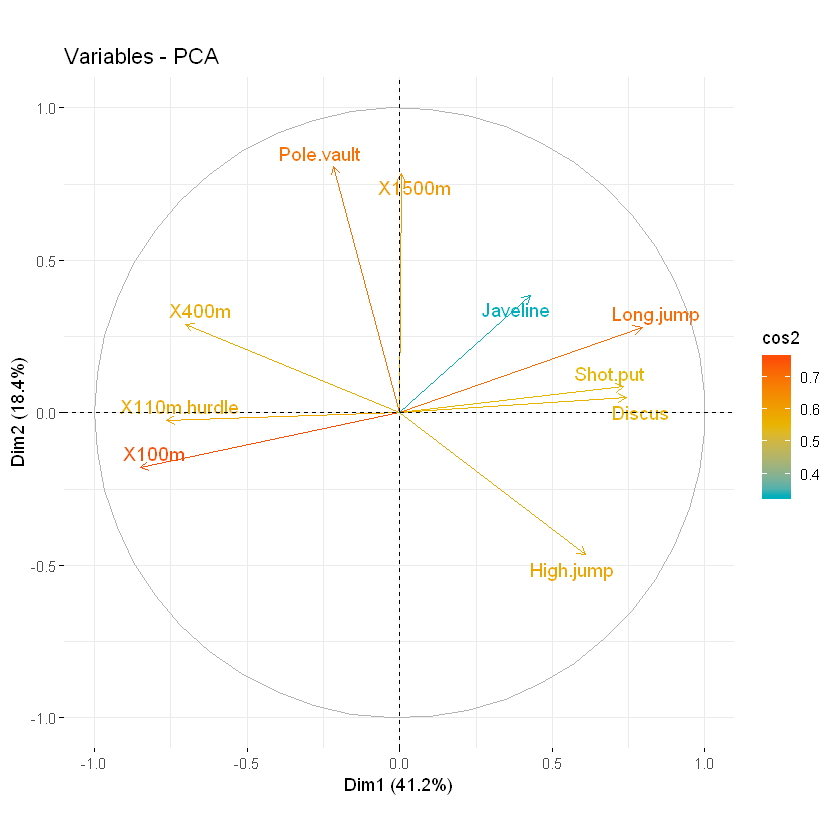

In [9]:
# Color by cos2 values: quality on the factor map
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
             )

当然，我们也可以通过改变变量的透明度 alpha.var来说明其重要性：

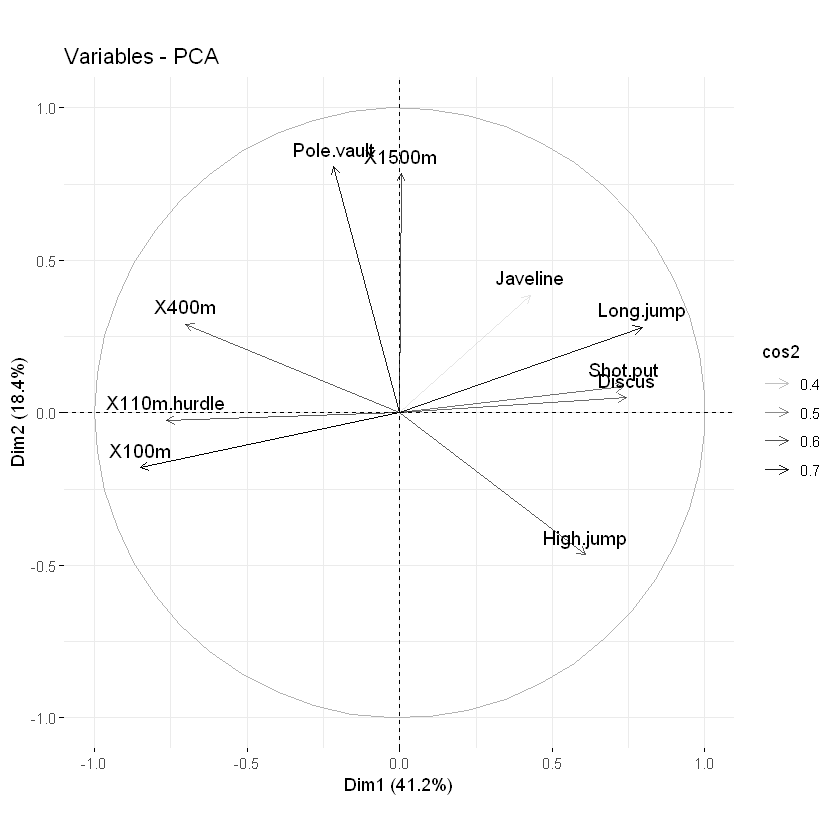

In [10]:
# Change the transparency by cos2 values
fviz_pca_var(res.pca, alpha.var = "cos2")

**变量对主成分的贡献作图**  
变量在计算给定主成分变异性时的贡献以百分比表示。与PC1（即Dim.1）和PC2（即Dim.2）相关的变量在解释数据集的可变性时是最重要的。
与任何PCA无关或与最后维度相关的变量是具有低贡献的变量，可能会被删除以简化整体分析。贡献值越大，变量对主成分的贡献越大。可以使用函数corrplot()[corrplot package]突出显示每个维度的最大贡献变量：

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,17.544293,1.7505098,7.338659,0.1375524,5.389252
Long.jump,15.293168,4.2904162,2.930094,1.6248594,7.748815
Shot.put,13.060137,0.3967224,21.620432,2.0140727,8.824401
High.jump,9.024811,11.7715838,8.792888,2.5498795,23.115504


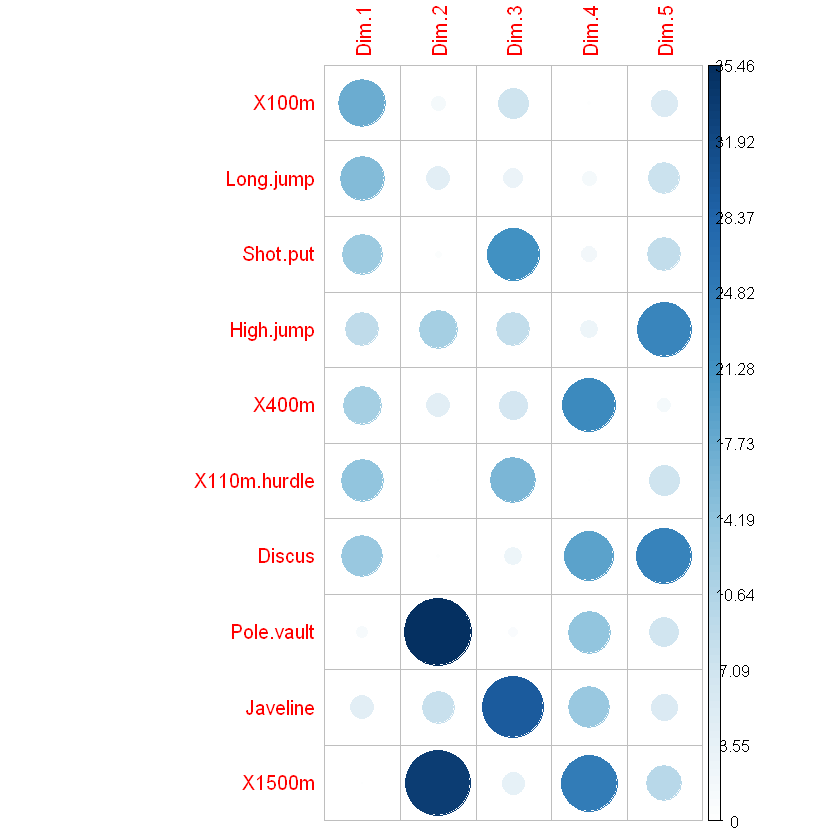

In [11]:
head(var$contrib, 4)
library("corrplot")
corrplot(var$contrib, is.corr=FALSE)    

函数fviz_contrib()[factoextra包]可用于绘制可变贡献的条形图。如果您的数据包含许多变量，则可以决定仅显示最常见的变量。下面的R代码显示了主要组件的前10个变量：



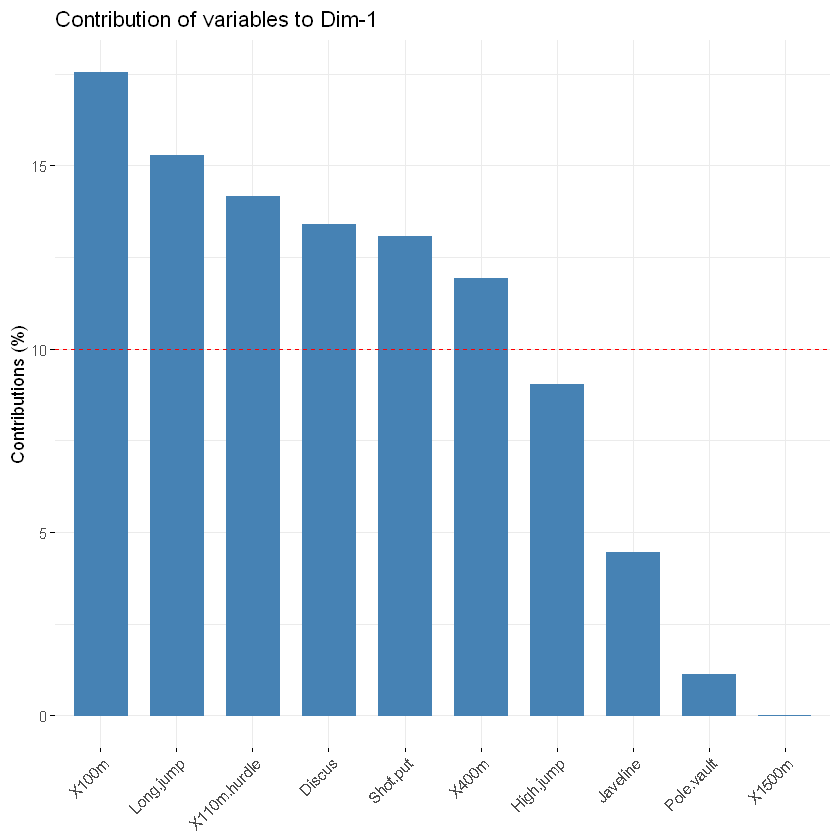

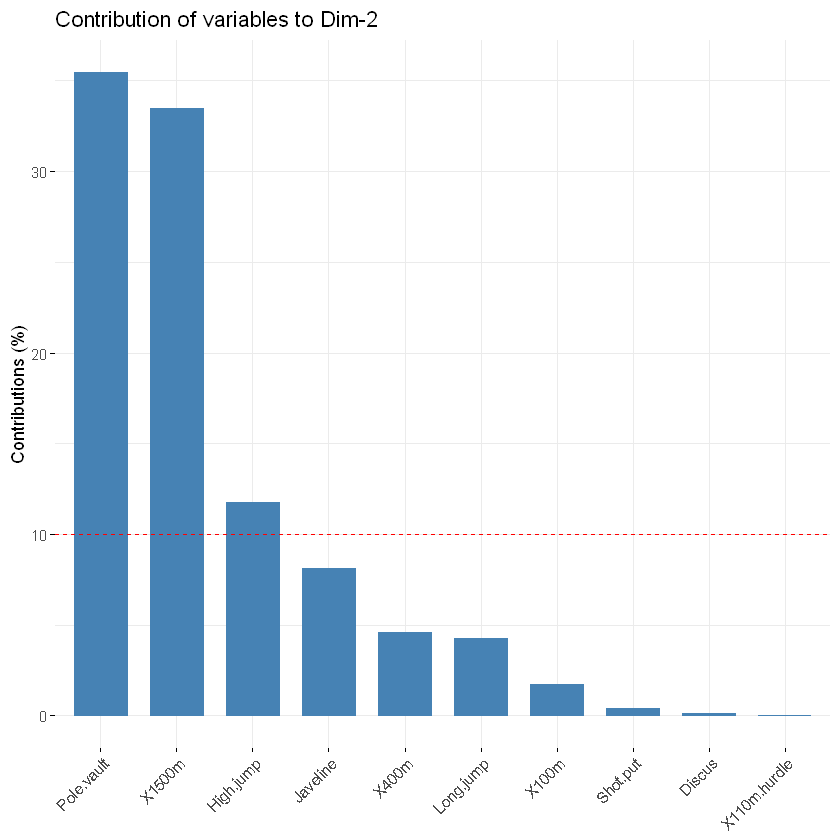

In [12]:
# Contributions of variables to PC1
# 各变量对第一主成分的贡献
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
# 各变量对第二主成分的贡献
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)

使用以下R代码获得对PC1和PC2的总贡献。其中axes指示坐标，top指示画前多少个变量，红色虚线代表着平均贡献，高于平均值的可以被认为算是重要变量。如果变量的贡献是均匀的，则预期值将是1 /长度（变量）= 1/10 = 10％。对于给定的组件，贡献大于此截止值的变量可以被认为对组件的贡献很重要。

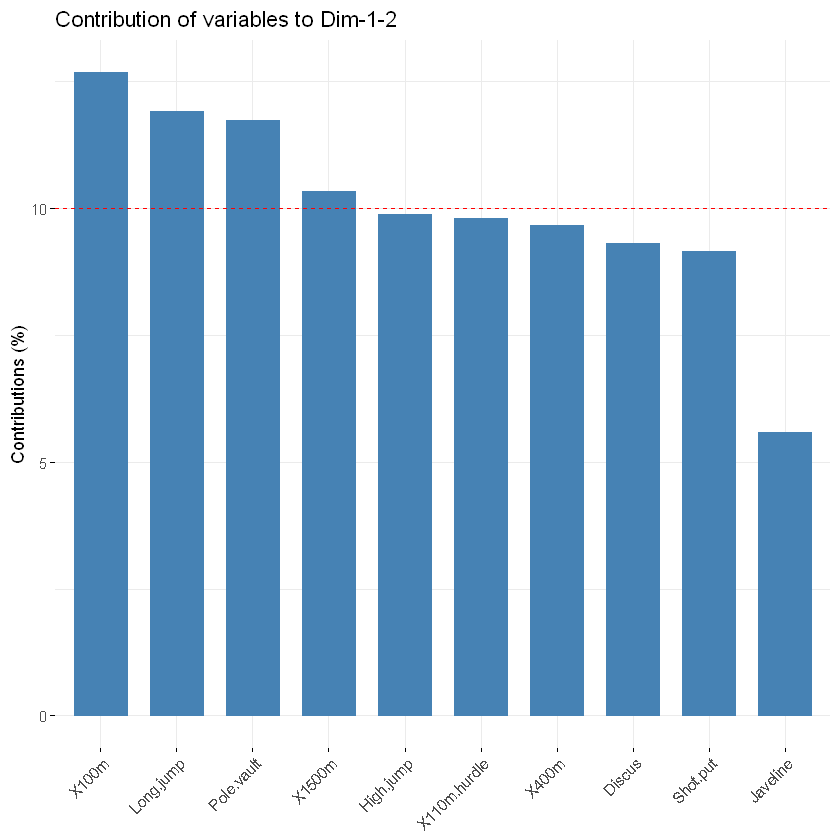

In [13]:
fviz_contrib(res.pca, choice = "var", axes = 1:2, top = 10)

但是注意给定变量的总贡献解释由两个主成分保留的变化，比如PC1和PC2不是简单的贡献率叠加，需要通过该公式计算得到contrib = [（C1 * Eig1）+（C2 * Eig2）] /（Eig1 + Eig2）。其中：
+ C1和C2分别是变量在PC1和PC2上的贡献
+ Eig1和Eig2分别是PC1和PC2的特征值。回想一下，特征值测量每个主成分保留的变化量。

在这种情况下，预期平均贡献（截止）计算如下：如上所述，如果10个变量的贡献是均匀的，则给定PC上的预期平均贡献将是1/10 = 10％。PC1和PC2变量的预期平均贡献为：[（10 * Eig1）+（10 * Eig2）] /（Eig1 + Eig2）。可以看出，变量 X100m，Long.jump和Pole.vault 对第一主成分和第二主成分2的贡献最大。 
类似于cos2的显示，最重要的（或贡献的）变量可以在相关图中突出显示如下：

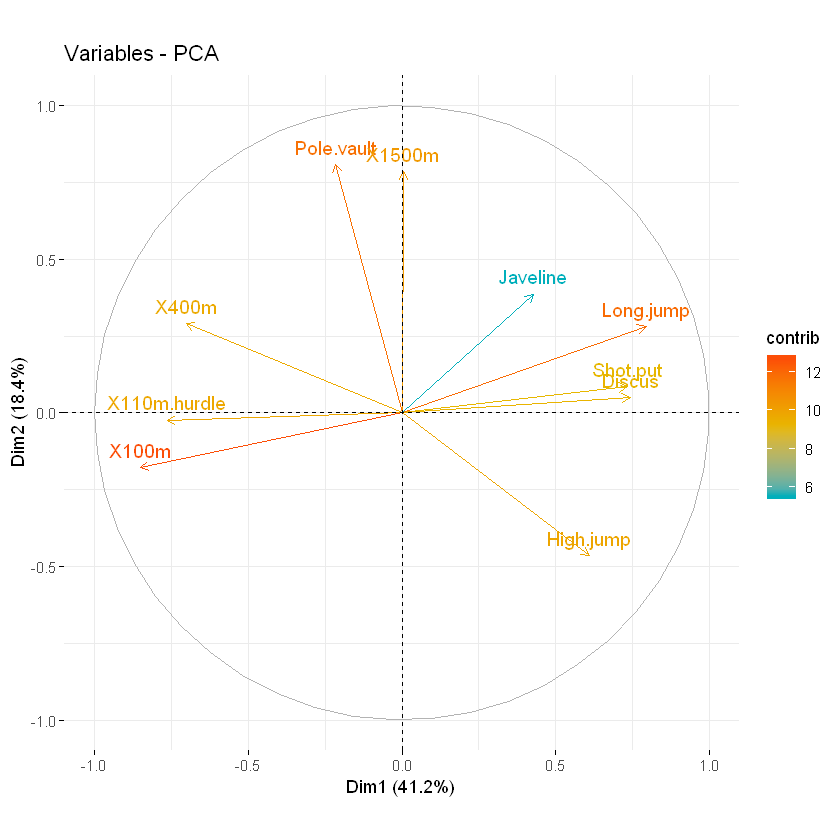

In [14]:
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

请注意，还可以使用选项根据其contrib值更改变量的透明度alpha.var = "contrib"。例如，键入以下内容：

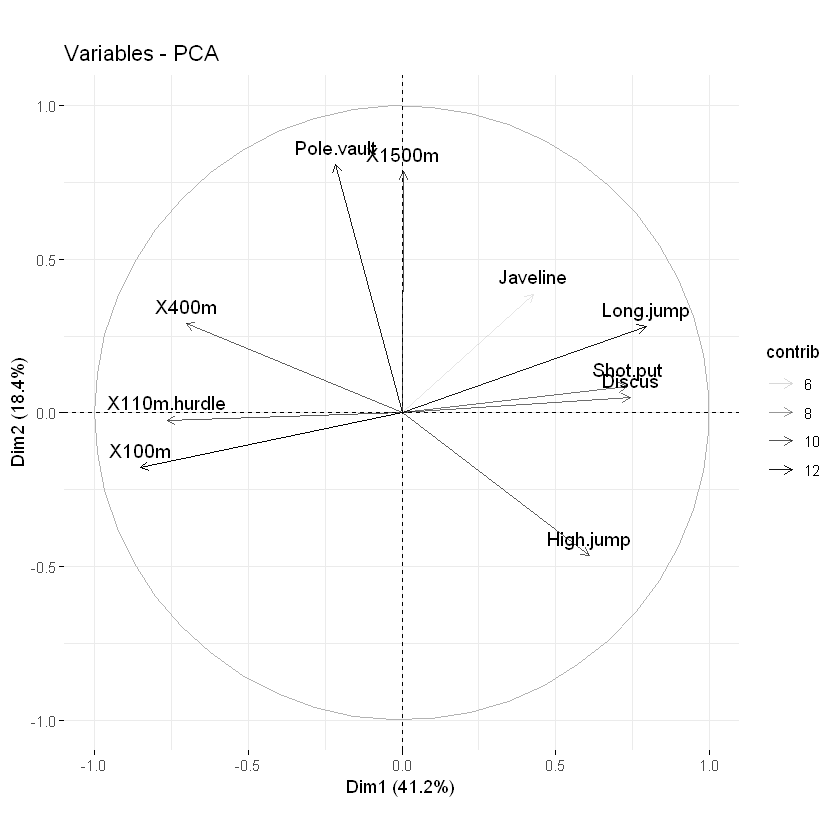

In [15]:
# Change the transparency by contrib values
fviz_pca_var(res.pca, alpha.var = "contrib")

#### 3.1.2 变量自定义作图

**由自定义连续变量着色**  
在前面的部分中，我们展示了如何根据贡献和cos2对变量进行着色。请注意，可以通过任何自定义连续变量为变量着色。着色变量的长度应与PCA中的活动变量数相同（此处n = 10）。例如，键入以下内容：

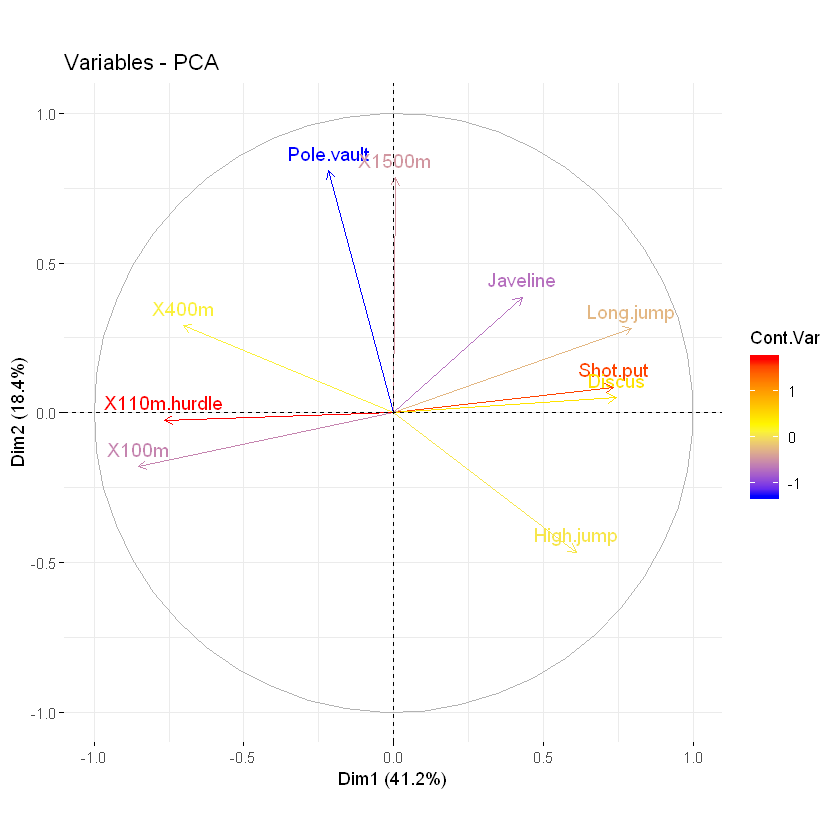

In [16]:
# Create a random continuous variable of length 10
# 生成随机数
set.seed(123)
my.cont.var <- rnorm(10)
# Color variables by the continuous variable
# col.var设置颜色
# gradient.cols设置颜色渐变范围
fviz_pca_var(res.pca, col.var = my.cont.var,
             gradient.cols = c("blue", "yellow", "red"),
             legend.title = "Cont.Var")

**按组确定颜色**  
也可以通过定性/分类变量定义的组来更改变量的颜色，也可以factor在R术语中调用。由于我们的数据集中没有任何分组变量用于分类变量，我们将创建它。在下面的演示示例中，我们首先使用kmeans聚类算法将变量分为3组。接下来，我们使用kmeans算法返回的聚类来着色变量.请注意，要更改组的颜色，应使用参数调色板。要更改渐变颜色，应使用参数gradient.cols。

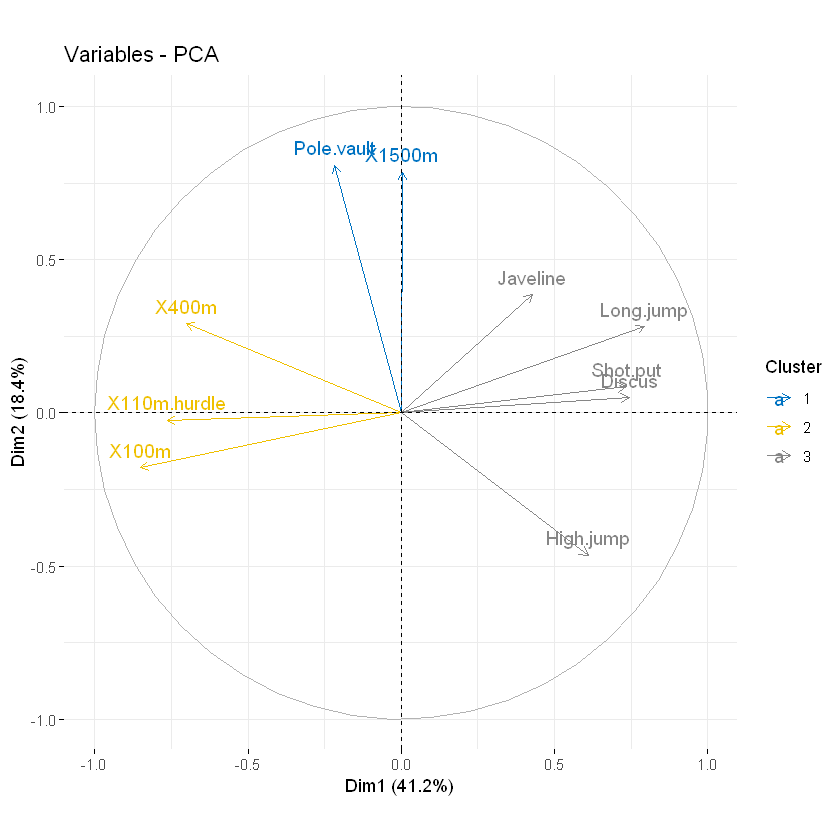

In [17]:
# Create a grouping variable using kmeans
# Create 3 groups of variables (centers = 3)
set.seed(123)
# 进行聚类
# center聚类数量
res.km <- kmeans(var$coord, centers = 3, nstart = 25)
# 将向量编码为因子
grp <- as.factor(res.km$cluster)
# Color variables by groups
fviz_pca_var(res.pca, col.var = grp, 
             palette = c("#0073C2FF", "#EFC000FF", "#868686FF"),
             legend.title = "Cluster")

**维度说明**  
对于维度描述可以通过dimdesc(函数[在FactoMineR中]用于标识具有给定主成分的最显着关联变量。在输出中，quant表示定量变量的结果。请注意，变量按相关性的p值排序。它可以用如下：

In [18]:
#proba用于表征维度的显着性阈值，
res.desc <- dimdesc(res.pca, axes = c(1,2), proba = 0.05)
# Description of dimension 1 第一主成分
res.desc$Dim.1

,correlation,p.value
Long.jump,0.7941806,6.059893e-06
Discus,0.7432090,4.842563e-05
Shot.put,0.7339127,6.723102e-05
High.jump,0.6100840,1.993677e-03
Javeline,0.4282266,4.149192e-02
X400m,-0.7016034,1.910387e-04
X110m.hurdle,-0.7641252,2.195812e-05
X100m,-0.8506257,2.727129e-07


In [19]:
# 第二主成分
res.desc$Dim.2

,correlation,p.value
Pole.vault,0.8074511,3.205016e-06
X1500m,0.7844802,9.384747e-06
High.jump,-0.4652142,2.529390e-02


### 3.2 观测值分析  
观测值指的是样本集中单个样本数据，R语言中数据每一行代表一个样本

#### 3.2.1 观测值基础作图  
可以使用函数get_pca_ind()[ factoextra package] 提取个体的结果。与此类似get_pca_var()，该函数get_pca_ind()提供了一个包含个体所有结果的矩阵列表（坐标，相关性，cos2和贡献率）

In [20]:
ind <- get_pca_ind(res.pca)
ind

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

fviz_pca_ind()用于产生观测值的曲线图。要创建简单的图，请键入：

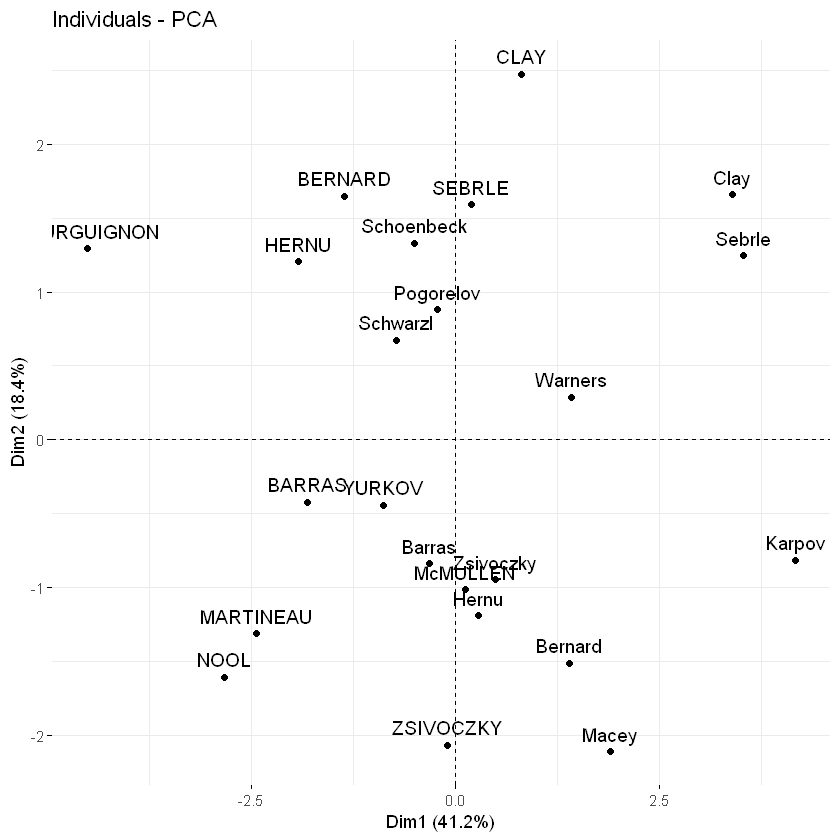

In [21]:
fviz_pca_ind(res.pca)

与变量一样，也可以通过cos2值为观测值着色：

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.007530179,0.49747323,0.081325232,0.001386688,0.2689026575
CLAY,0.048701249,0.45701660,0.143628117,0.125791741,0.0507850580
BERNARD,0.197199804,0.28996555,0.004294015,0.411819183,0.0007567259
YURKOV,0.096109800,0.02382571,0.778230322,0.061812637,0.0202279796
ZSIVOCZKY,0.001574385,0.57641944,0.239754152,0.001388216,0.0054654972
McMULLEN,0.002175437,0.15219499,0.110137872,0.266486530,0.3892621478


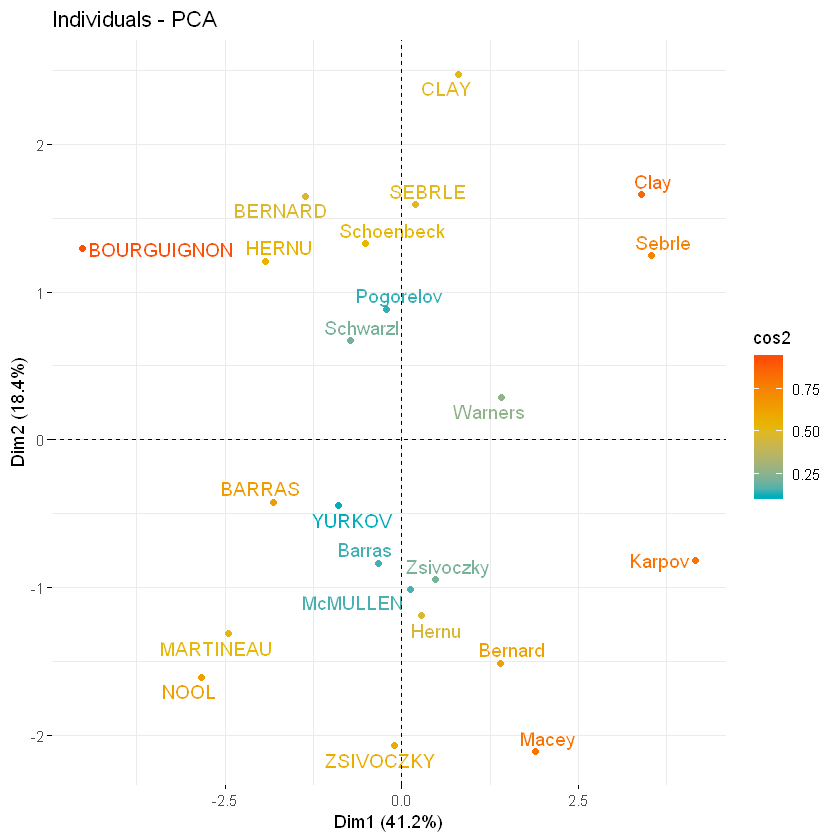

In [22]:
# Quality of individuals
head(ind$cos2)
# repel=TRUE能够避免部分重合的点重叠
fviz_pca_ind(res.pca, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

你还可以通过pointsize和gradient.cols改变点的大小和颜色

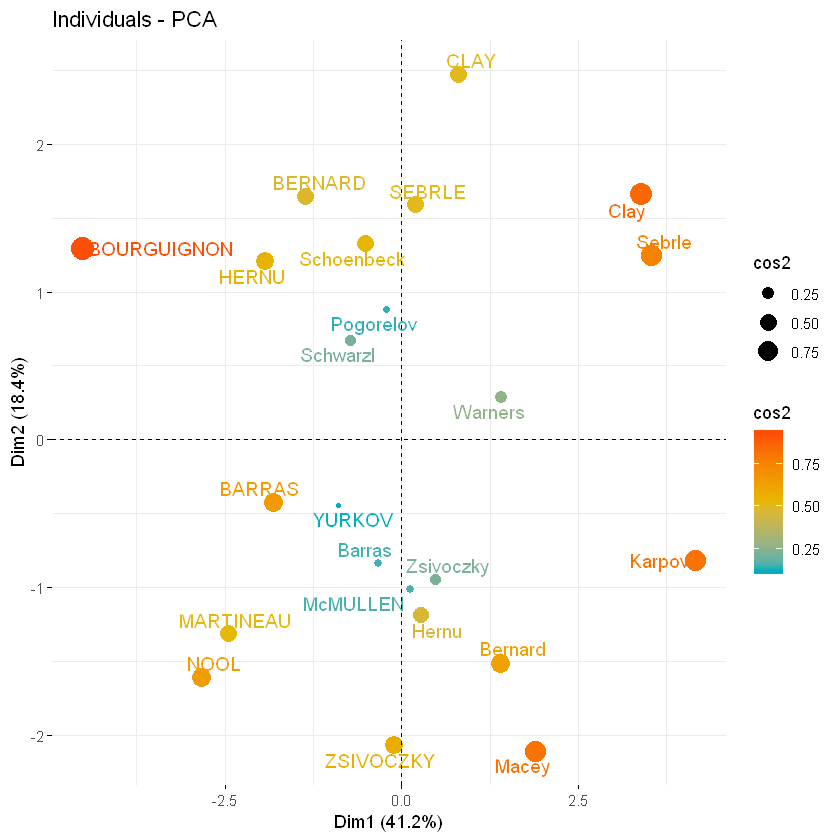

In [23]:
fviz_pca_ind(res.pca, col.ind = "cos2", pointsize = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

要在图上创建观测量表示cos2的条形图，您可以使用fviz_cos2()前面描述的变量函数，通过choice选择类型，变量是var，观测量是ind

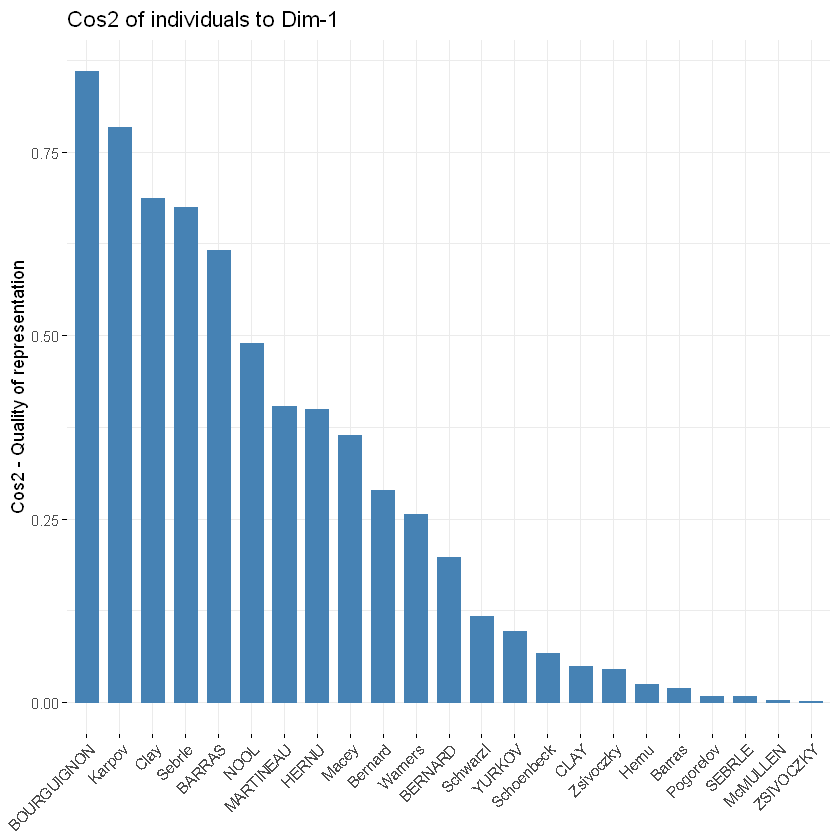

In [24]:
fviz_cos2(res.pca, choice = "ind")

要想描绘观测量对前两个主要组成部分的贡献，请键入：

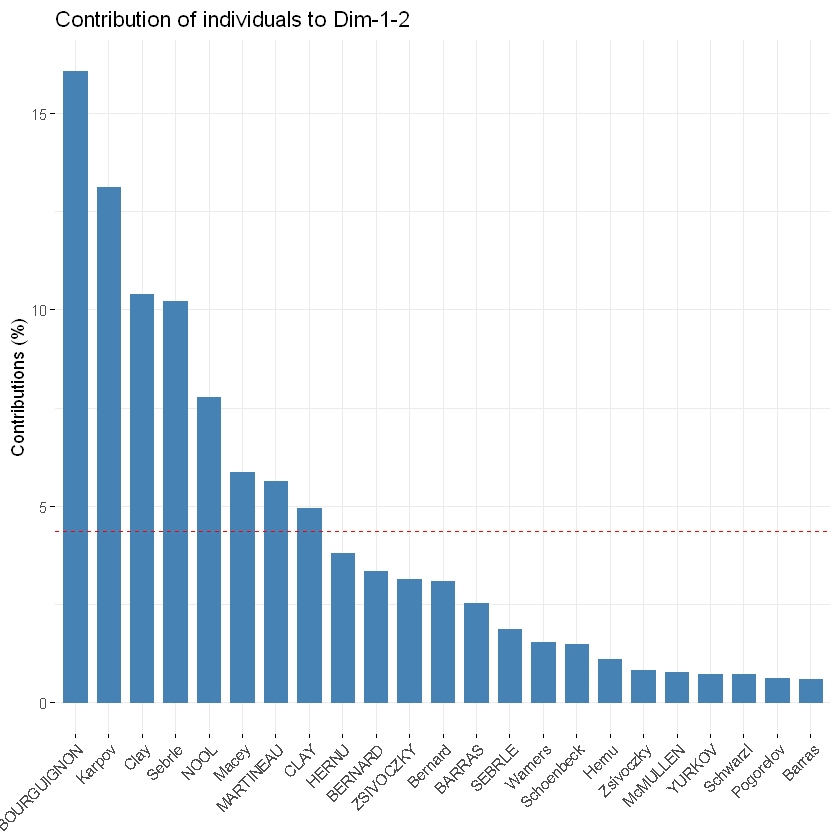

In [25]:
# Total contribution on PC1 and PC2
fviz_contrib(res.pca, choice = "ind", axes = 1:2)

#### 3.2.2 观测值自定义作图  
在这里，我们描述了如何按组对观测量进行着色。此外，我们将展示如何按组添加浓度椭圆和置信椭圆。为此，我们将使iris数据作为演示数据集。iris数据集如下所示：

In [26]:
head(iris, 3)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa


iris数据集包含150个数据样本，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。“Species”列将用作分组变量。我们首先计算主成分分析如下：

In [27]:
# The variable Species (index = 5) is removed before PCA analysis
# 第5列不进行PCA运算
iris.pca <- PCA(iris[,-5], graph = FALSE)

在下面的R代码中：参数habillage或col.ind可用于指定因子变量以按组着色个体。要在每个组周围添加集中椭圆，请指定参数addEllipses = TRUE。该参数palette可用于更改组颜色。要删除组平均点（组的重心），请指定参数mean.point = FALSE。如果你想要置信椭圆而不是集中椭圆，请使用ellipse.type =“confidence”。置信椭圆是对置信区域的描述，浓度椭圆是对点分布的描述。置信椭圆的算法复杂，背后有很多繁杂的数学原理。置信椭圆的长短半轴，分别表示二维位置坐标分量的标准差（如经度的σλ和纬度的σφ）。一倍标准差（1σ）的概率值是68.3%，二倍标准差（2σ）的概率值为95.5%；三倍标准差（3σ）的概率值是99.7%。

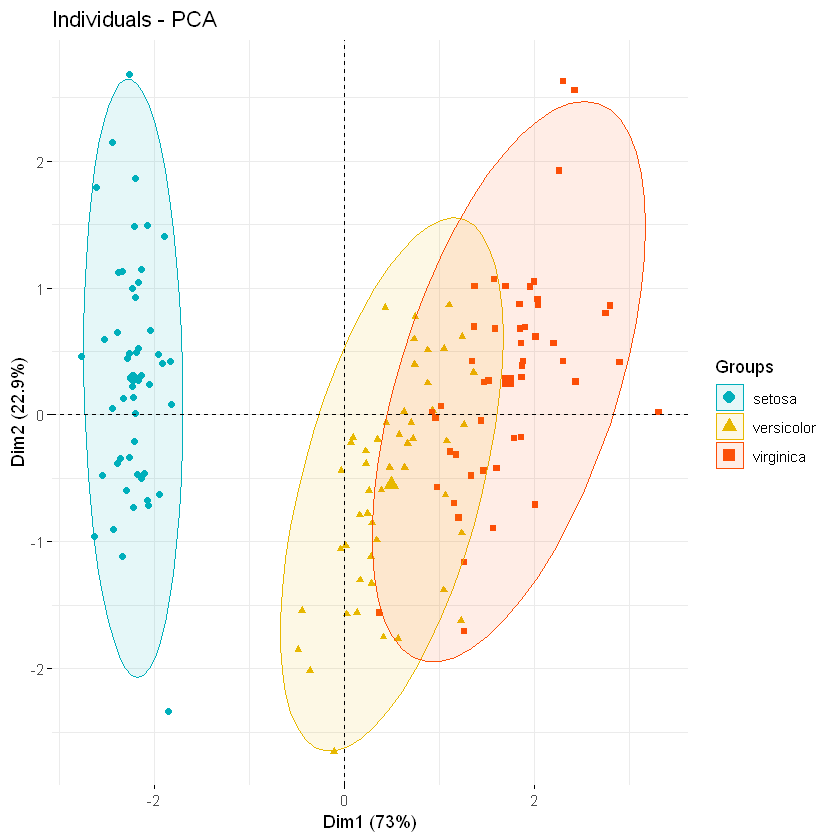

In [28]:
fviz_pca_ind(iris.pca,
             # show points only (nbut not "text") 只显示点而不显示文本，默认都显示
             geom.ind = "point", 
             # 设定分类种类
             col.ind = iris$Species,
             # 设定颜色
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             # 添加椭圆 Concentration ellipses
             addEllipses = TRUE,
             legend.title = "Groups",
             )

请注意，调色板的允许值包括：
+ 灰色调色板的“grey”;
+ brewer调色板例如“RdBu”，“Blues”，......; 要查看全部，请在R：中键入RColorBrewer::display.brewer.all()。
+ 自定义调色板，例如c（“蓝色”，“红色”）;
+ 科学期刊调色板（来自ggsci R package），例如：“npg”，“aaas”，“lancet”，“jco”，“ucscgb”，“uchicago”，“simpsons”和“rickandmorty”。这些"npg"，"jco"都是杂志或者出版集团的缩写，具体搜索就行。

例如，要使用jco（临床肿瘤学杂志）调色板，请输入以下内容：

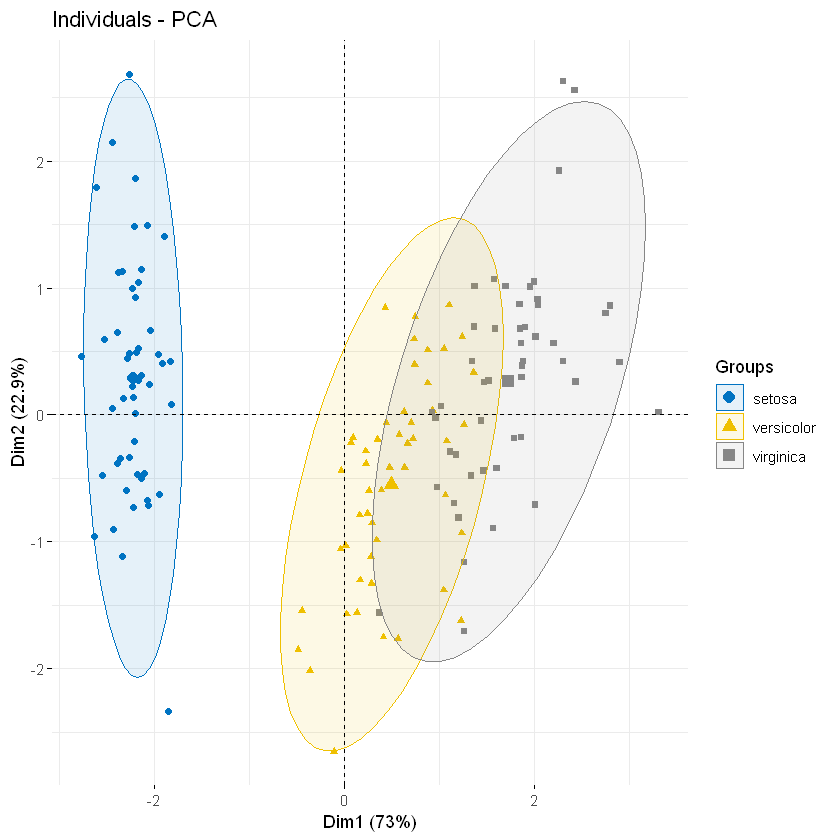

In [29]:
fviz_pca_ind(iris.pca,
             label = "none", # hide individual labels
             habillage = iris$Species, # color by groups
             addEllipses = TRUE, # Concentration ellipses
             palette = "jco"
             )

### 3.3 图表定制  
注意，fviz_pca_ind()和fviz_pca_var()相关的函数是核心函数的包装fviz()[在factoextra ]。fviz（）是函数ggscatter()[在ggpubr]中的包装器。因此，可以在fviz_pca_ind（）和fviz_pca_var（）中指定要传递给函数fviz（）和ggscatter（）的其他参数。在这里，我们提供了一些额外的参数来定制变量和观测量的PCA图。

#### 3.3.1 基础要素

**维度**  
默认情况下，变量/观测量在主成分1和2上表示。例如，如果要在主成分2和3上可视化它们，则应指定参数axes = c(2, 3)。

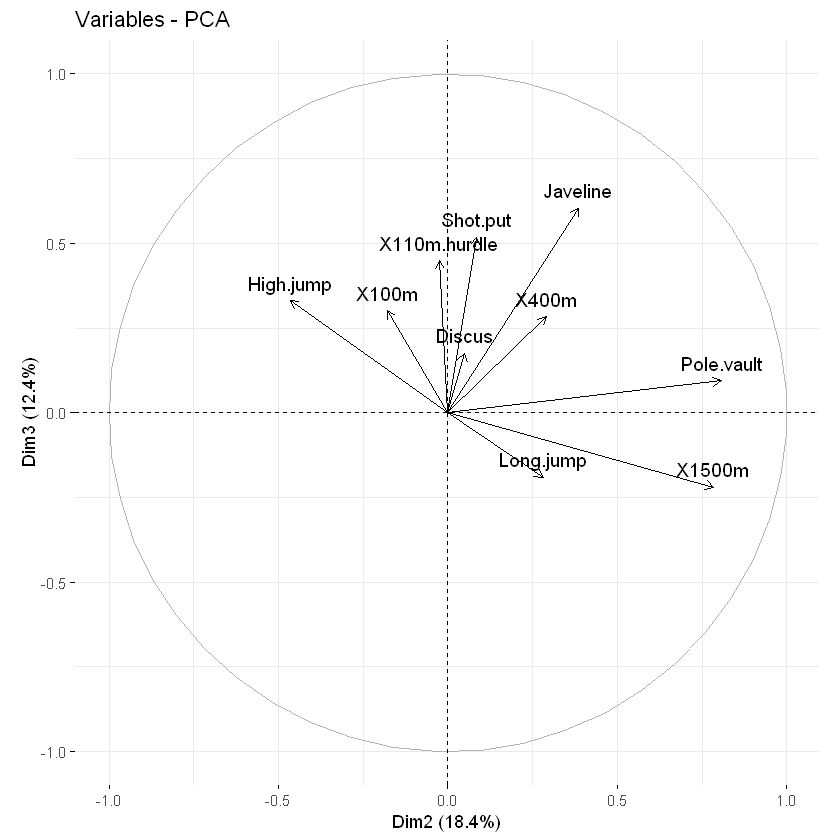

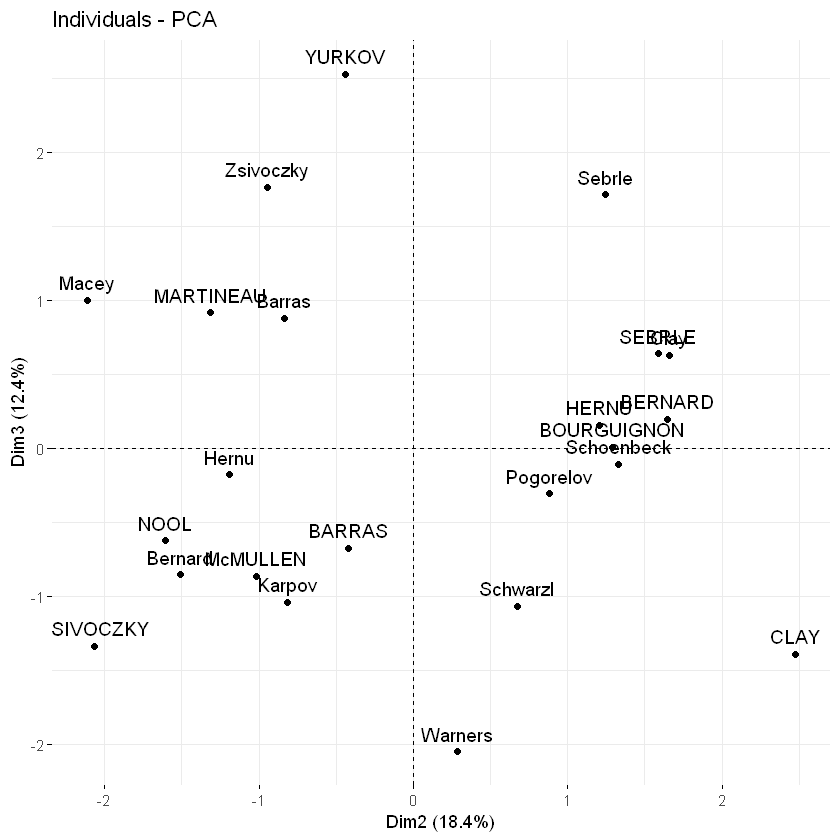

In [30]:
# Variables on dimensions 2 and 3
fviz_pca_var(res.pca, axes = c(2, 3))
# Individuals on dimensions 2 and 3
fviz_pca_ind(res.pca, axes = c(2, 3))

**绘图元素：点，文本，箭头**  
参数geom（对于几何）和导数用于指定要用于绘图的几何元素或图形元素。
1. geom.var：一个文本，指定用于绘制变量的几何参数。允许值是c（“点”，“箭头”，“文本”）的组合。
    + 使用geom.var = "point"，仅显示点；
    + 用于geom.var = "text"仅显示文本标签；
    + 使用geom.var = c("point", "text")同时显示点和文字标签；
    + 使用geom.var = c("arrow", "text")显示箭头和标签（默认）。
    
例如，键入以下内容：

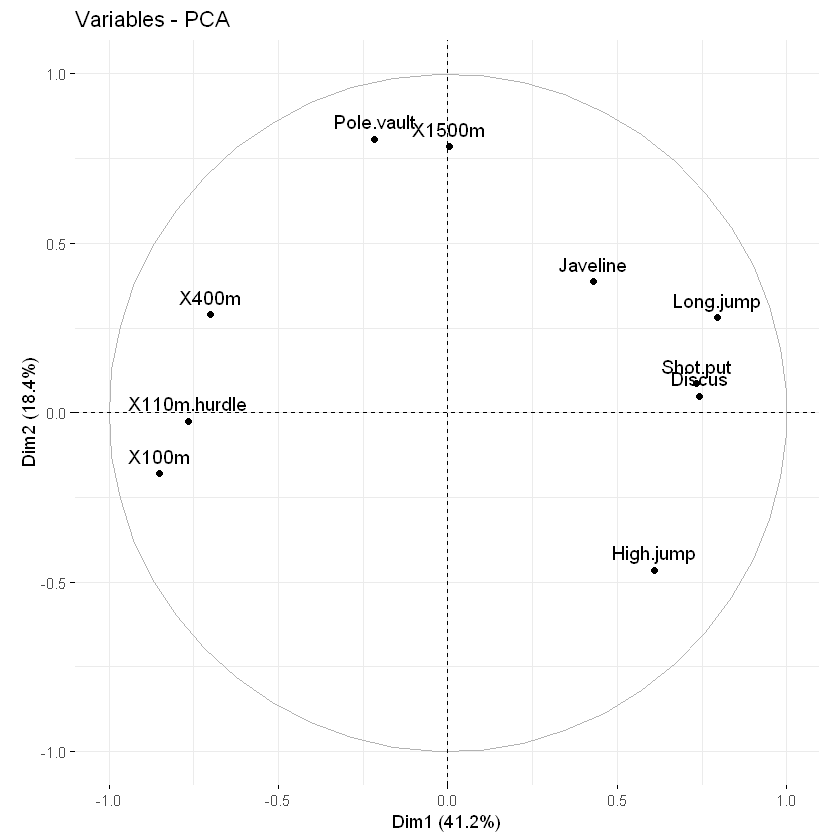

In [31]:
# Show variable points and text labels
fviz_pca_var(res.pca, geom.var = c("point", "text"))

2. geom.ind：一个文本，指定用于绘制观测值的几何体。允许值是c("point", "text")的组合。
    + 使用geom.ind = "point"，仅显示点;
    + 用于geom.ind = "text"仅显示文本标签;
    + 使用geom.ind = c("point", "text")同时显示点和文本标签（默认)。
    
例如，键入以下内容：

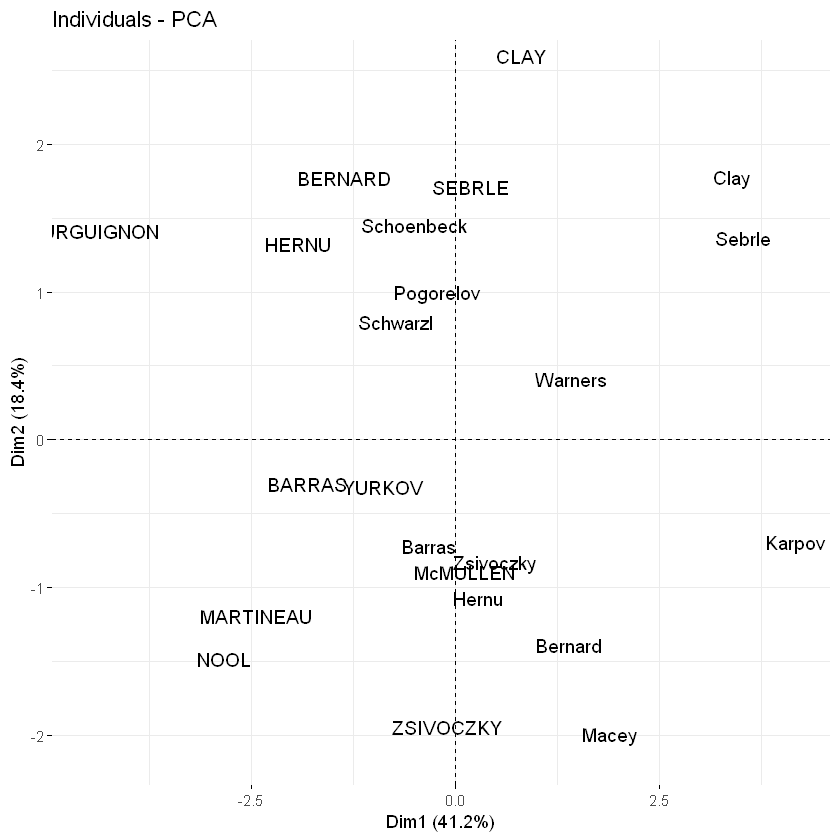

In [32]:
# Show individuals text labels only
fviz_pca_ind(res.pca, geom.ind =  "text")

**绘图元素的大小和形状**  
+ labelsize：文本标签的字体大小，例如：labelsize = 4。
+ pointsize：点的大小，例如：pointsize = 1.5。
+ arrowsize：箭头的大小。控制箭头的粗细，例如：arrowsize = 0.5。
+ pointshape：点的形状，pointshape = 21。键入ggpubr::show_point_shapes()以查看可用的点形。

具体例子如下：

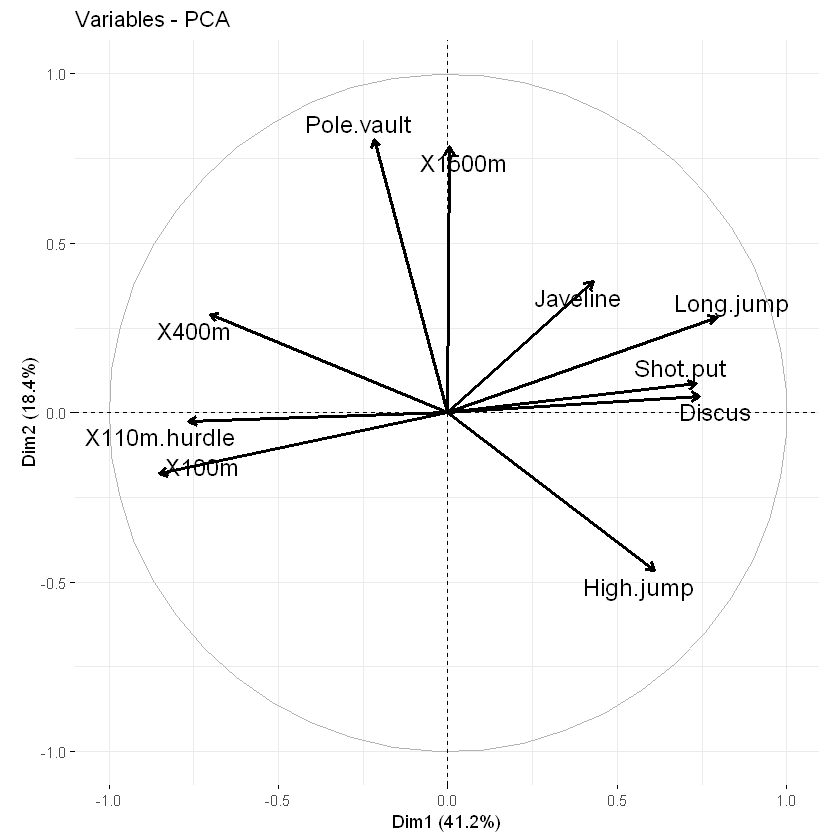

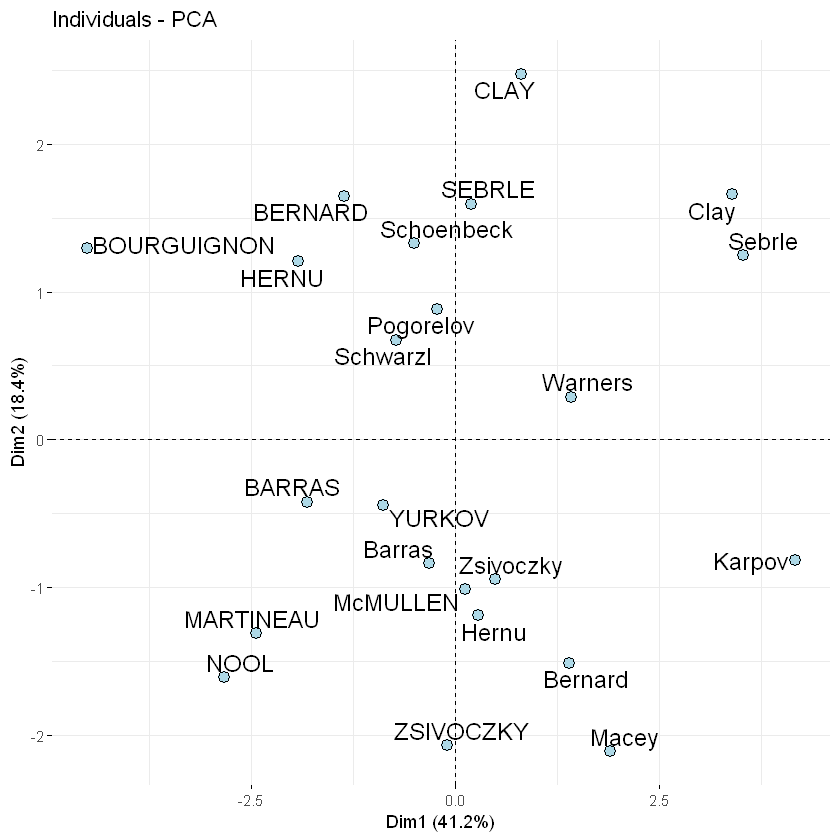

In [33]:
# Change the size of arrows an labels
fviz_pca_var(res.pca, arrowsize = 1, labelsize = 5, 
             repel = TRUE)
# Change points size, shape and fill color
# Change labelsize
fviz_pca_ind(res.pca, 
             pointsize = 3, pointshape = 21, fill = "lightblue",
             labelsize = 5, repel = TRUE)

**椭圆的添加**  
正如我们在上一节中所描述的，当按组着色观测值时，可以使用参数添加点集中椭圆addEllipses = TRUE。请注意，该参数ellipse.type可用于更改省略号的类型。可能的值是：
+ "convex"：绘制一组凸包。
+ "confidence"：将组平均点周围的置信椭圆作为函数coord.ellipse()[在FactoMineR中]。
+ "t"：假设多变量t分布。
+ "norm"：假设多元正态分布。
+ "euclid"：绘制一个半径等于水平的圆圈，表示距离中心的欧氏距离。除非coord_fixed()应用，否则此椭圆可能不会显示为圆形。

该参数ellipse.level也可用于以正常概率改变浓集中椭圆的大小。例如，指定ellipse.level = 0.95或ellipse.level = 0.66。具体例子如下：

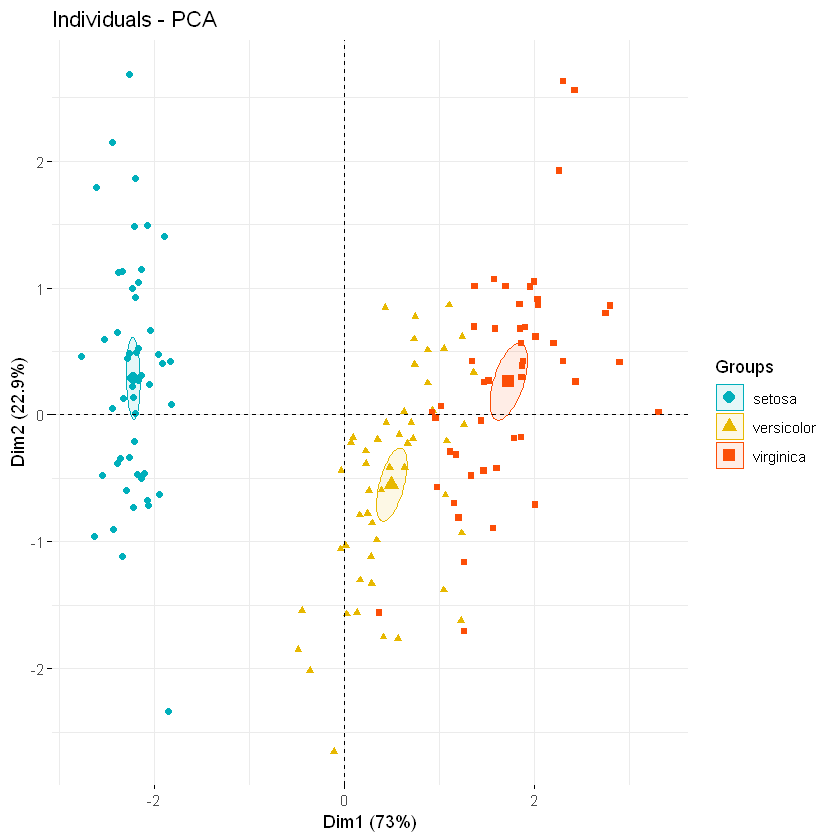

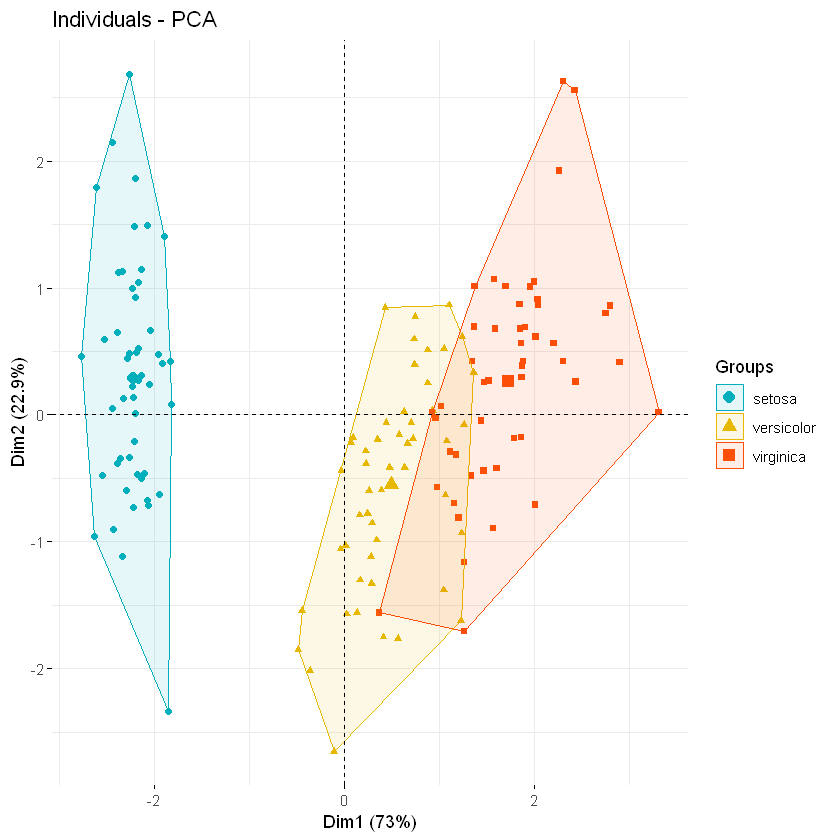

In [34]:
# Add confidence ellipses
fviz_pca_ind(iris.pca, geom.ind = "point", 
             # 使用iris数据集
             col.ind = iris$Species, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, ellipse.type = "confidence",
             legend.title = "Groups"
             )
# Convex hull
fviz_pca_ind(iris.pca, geom.ind = "point",
             col.ind = iris$Species, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             # 用凸包多边形代替椭圆
             addEllipses = TRUE, ellipse.type = "convex",
             legend.title = "Groups"
             )


**轴线**  
该参数axes.linetype可用于指定轴的线型。默认为“虚线”。允许的值包括“blank”,“solid”, “dotted”等。要查看所有可能的值，请ggpubr::show_line_types()在R中键入。要删除轴线，请使用axes.linetype =“blank”.具体使用如下：

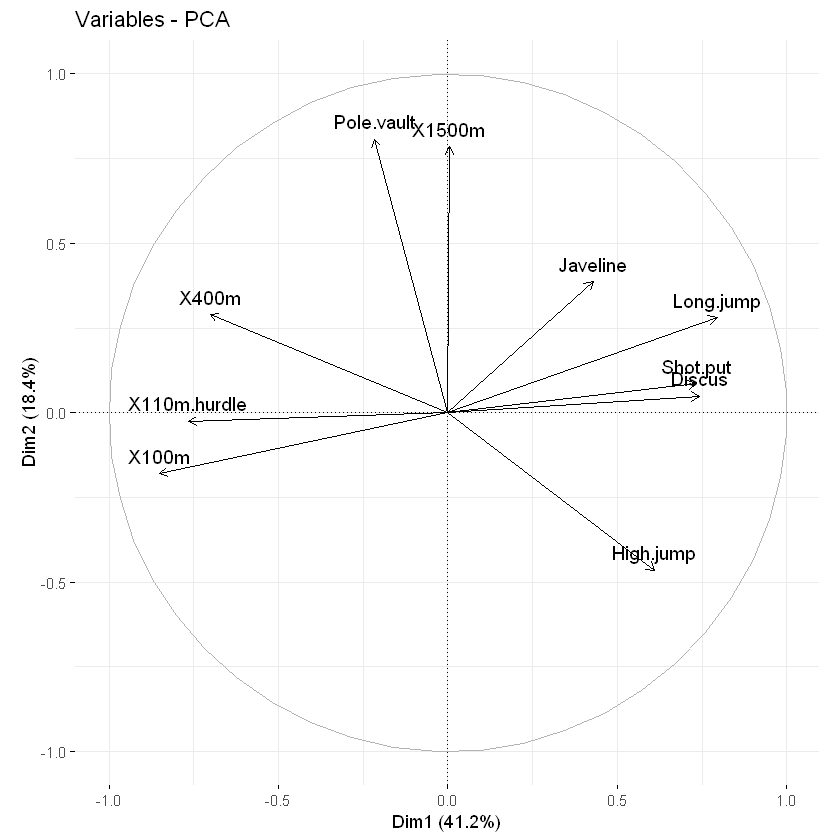

In [35]:
fviz_pca_var(res.pca, axes.linetype = "dotted")

**图形参数**  
要轻松更改任何ggplots的图形，可以使用函数ggpar[ggpubr package]。可以使用ggpar（）更改的图形参数包括：
+ 主要标题，轴标签和图例标题
+ 标题位置。可能的值：“top”，“bottom”，“left”，“right”，“none”。
+ 调色板。
+ 主题。允许的值包括：theme_gray（），theme_bw（），theme_minimal（），theme_classic（），theme_void（）。

具体使用如下：

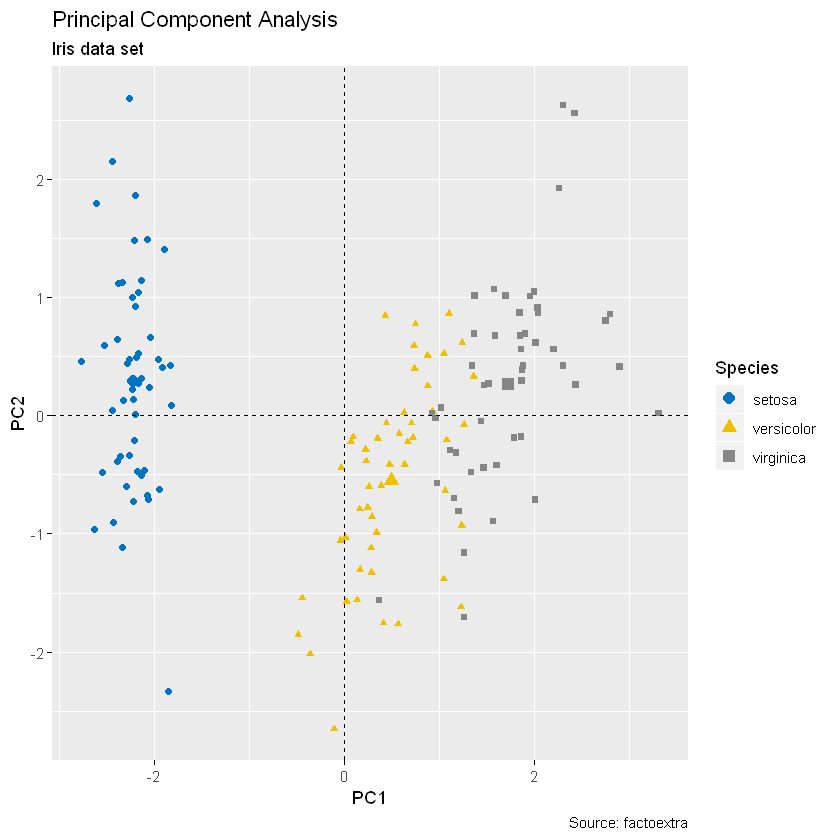

In [36]:
ind.p <- fviz_pca_ind(iris.pca, geom = "point", col.ind = iris$Species)
ggpubr::ggpar(ind.p,
              title = "Principal Component Analysis",
              # 下标题
              subtitle = "Iris data set",
              # 说明
              caption = "Source: factoextra",
              # x,y轴标题
              xlab = "PC1", ylab = "PC2",
              # 标题名字位置
              legend.title = "Species", legend.position = "top",
              # 主题和配设
              ggtheme = theme_gray(), palette = "jco"
              )

**Biplot**  
Biplot为主成分分析双标图。注意biplot图可能仅在数据集中存在少量变量和观测量时才有用; 否则最终的情节将无法辨认。另请注意，观察值和变量的坐标不是在同一空间上构建的。因此，在biplot图中，您应该主要关注变量的方向，而不是它们在图上的绝对位置。粗略地说：biplot展示了两方面内容：
1. 根据前两个主成分，每个观测的得分；
2. 根据前两个主成分，每个变量的载荷。  

其具体说明意义如下：
+ 向量在横坐标的投影就是对主成分2的载荷（系数），在纵坐标的投影就是对主成分1的载荷。（具体轴对应哪个变量看轴名）。但是这些都是近似，因为坐标轴有所不同；
+ 点代表的是观测值，点之间的距离，反映它们对应的样本之间的差异大小，两点相距较远，对应样本差异大；两点相距较近，对应样本差异小，存在相似性；
+ 两向量余弦值的绝对值大小反映两向量间的相关性大小，值越大表明两个向量对应的属性之间相关性越高。当两个向量近似垂直时，两个属性之间相关性很弱，几乎互不影响。  

详细解释见：  
+ https://stats.stackexchange.com/questions/2038/interpretation-of-biplots-in-principal-components-analysis
+ https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/  

要制作观测量和变量的biplot.请键入：

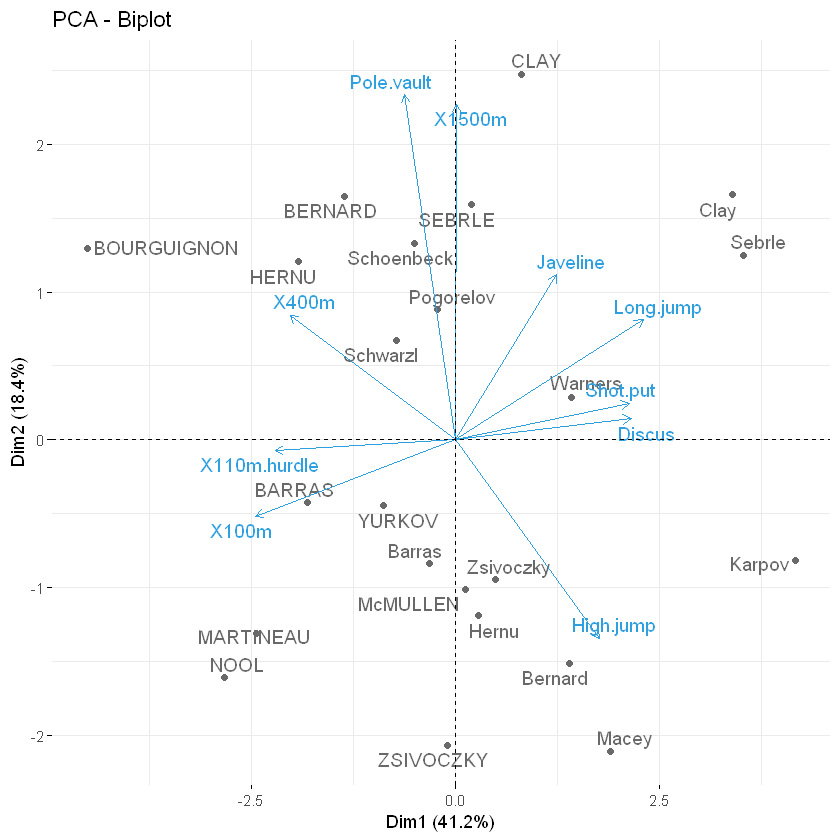

In [37]:
fviz_pca_biplot(res.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

现在，使用iris.pca输出，让我们：
+ 制作观测量和变量的双重图
+ 按组更改观测量颜色：col.ind = iris $ Species
+ 仅显示变量的标签：label = "var"或使用geom.ind = "point"

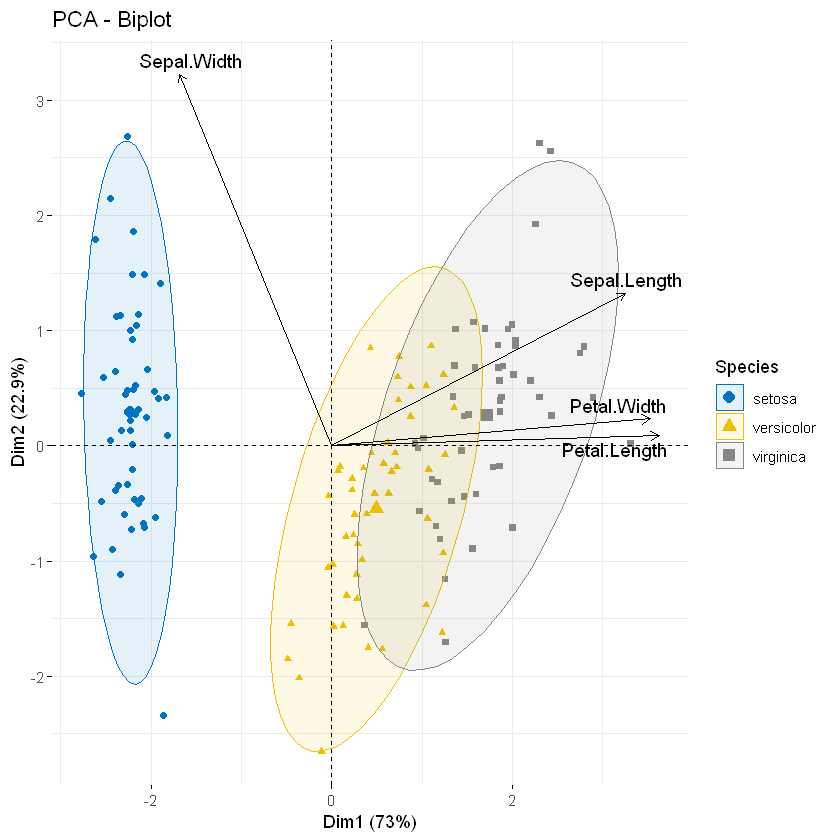

In [38]:
fviz_pca_biplot(iris.pca, 
                # 观测量颜色
                col.ind = iris$Species, palette = "jco", 
                # 添加椭圆
                addEllipses = TRUE, label = "var",
                # 线条颜色
                col.var = "black", repel = TRUE,
                legend.title = "Species") 

在下面的示例中，我们希望按组为观测量和变量着色。诀窍是对各个观测点使用pointshape = 21。可以使用参数fill.ind通过颜色填充此特定点形状。使用 col.inds设置各个点的边框线颜色设置为“black”。使用参数col.var按组对变量着色。要自定义个体和变量颜色，我们使用辅助函数fill_palette()和color_palette()[在ggpubr包中]

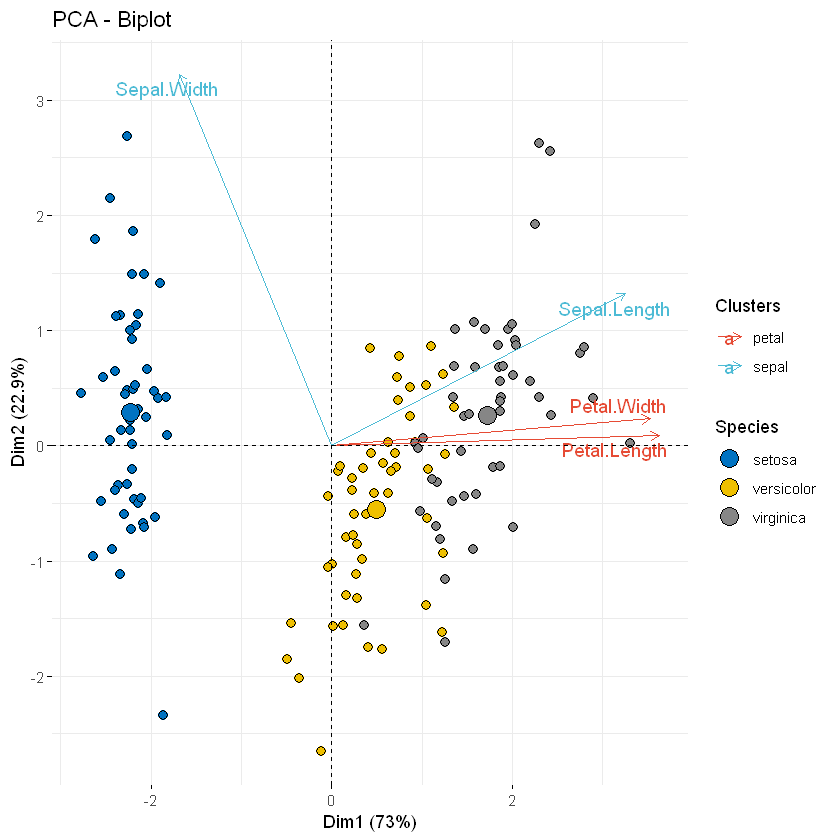

In [39]:
fviz_pca_biplot(iris.pca, 
                # Fill individuals by groups
                geom.ind = "point",
                # 点的形状
                pointshape = 21,
                # 点的大小
                pointsize = 2.5,
                # 按照组类特定形状
                fill.ind = iris$Species,
                col.ind = "black",
                # Color variable by groups
                # 颜色
                col.var = factor(c("sepal", "sepal", "petal", "petal")),
                # 标题
                legend.title = list(fill = "Species", color = "Clusters"),
                repel = TRUE        # Avoid label overplotting
             )+
  ggpubr::fill_palette("jco")+      # Indiviual fill color
  ggpubr::color_palette("npg")      # Variable colors

另一个复杂的例子是按组（离散颜色）和变量对主要成分（渐变颜色）的贡献对个体进行着色。另外，我们将使用参数alpha.var通过贡献率来改变变量的透明度。

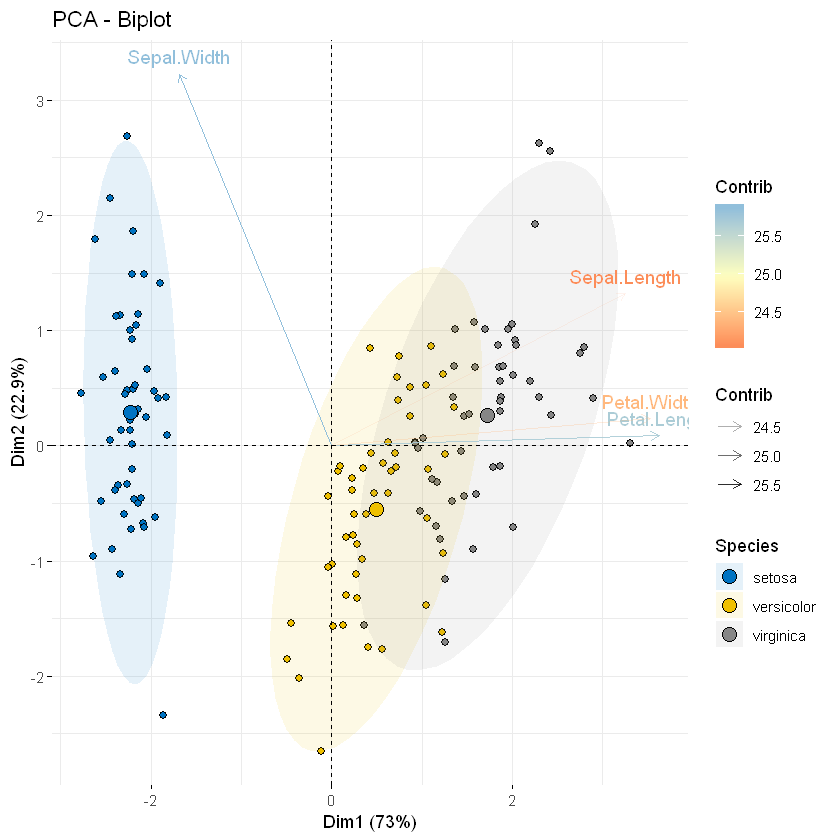

In [40]:
fviz_pca_biplot(iris.pca, 
                # Individuals
                geom.ind = "point",
                fill.ind = iris$Species, col.ind = "black",
                pointshape = 21, pointsize = 2,
                palette = "jco",
                addEllipses = TRUE,
                # Variables
                alpha.var ="contrib", col.var = "contrib",
                gradient.cols = "RdYlBu",
                
                legend.title = list(fill = "Species", color = "Contrib",
                                    alpha = "Contrib")
                )

**过滤结果**  
如果您有许多个体/变量，则可以使用参数select.ind和select.var仅显示其中一些观测量/变量。select.ind, select.var:选择要绘制的个体/变量。允许的值为NULL或包含参数name，cos2或contrib 的列表：
+ name：是一个包含要绘制的个体/变量名称的字符向量；
+ cos2：如果cos2在[0,1]中，例如：0.6，则绘制cos2> 0.6的观测量/变量；
+ if cos2 > 1，例如：5，然后绘制具有最高cos2的前5个活动观测量/变量；
+ contrib：如果contrib> 1，例如：5，则绘制具有最高贡献的前5个观测量/变量。

具体使用如下：

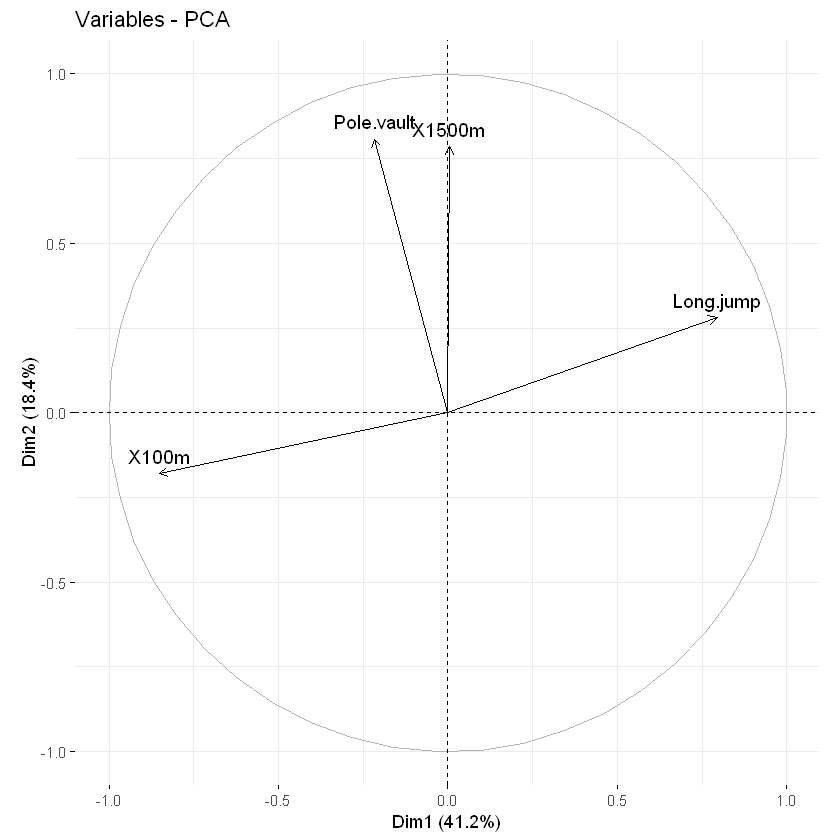

In [41]:
# Visualize variable with cos2 >= 0.6
# 可视化cos2>0.6
fviz_pca_var(res.pca, select.var = list(cos2 = 0.6))

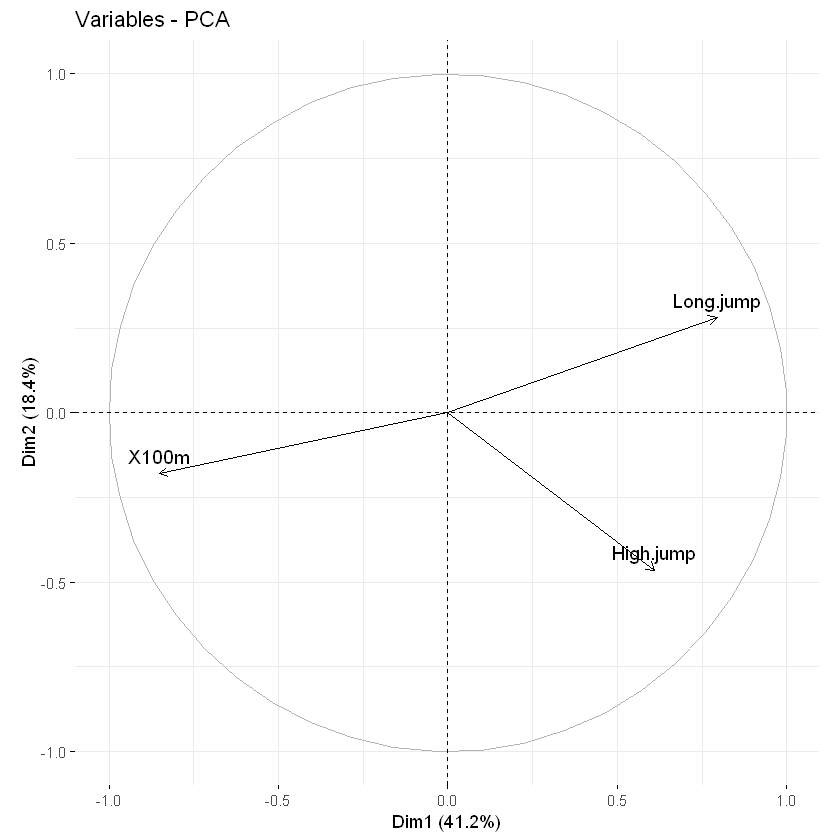

In [42]:
# Select by names
# 根据名字显示
name <- list(name = c("Long.jump", "High.jump", "X100m"))
fviz_pca_var(res.pca, select.var = name)

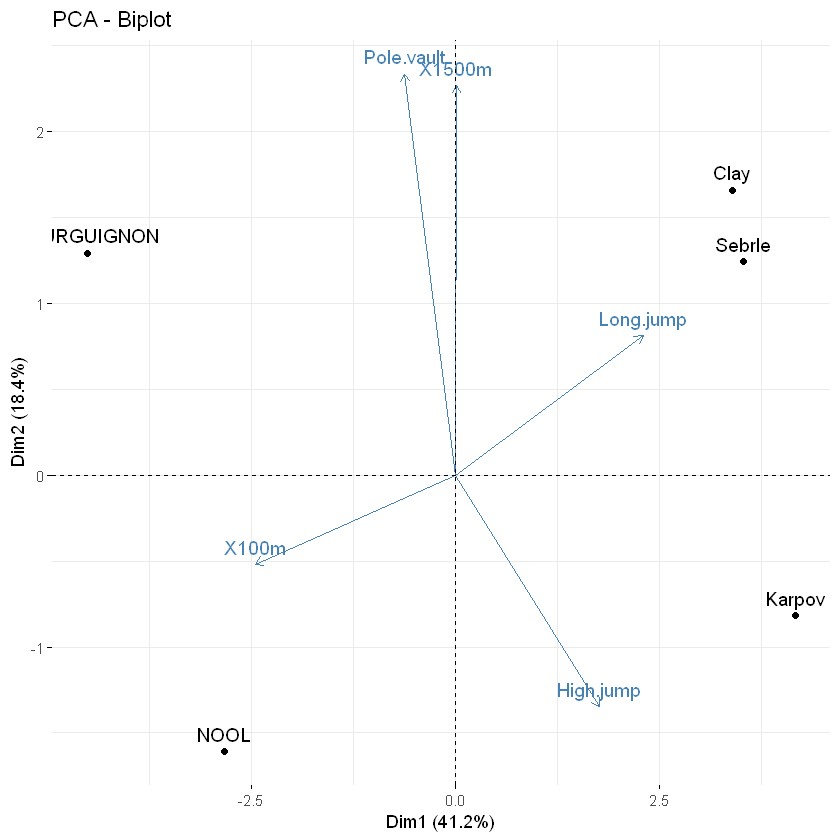

In [43]:
# 根据前五贡献
# top 5 contributing individuals and variable
fviz_pca_biplot(res.pca, select.ind = list(contrib = 5), 
               select.var = list(contrib = 5),
               ggtheme = theme_minimal())

#### 3.3.2 导出结果  
**将图表导出为PDF / PNG文件**  
该factoextra包生成基于ggplot2的图形。要保存任何ggplots，标准R代码如下：  
``` R
pdf("myplot.pdf")
print(myplot)
dev.off()
```

在以下示例中，我们将向您展示如何将不同的图表保存为pdf或png文件。
1. 创建您想要的图作为R对象：
```
# Scree plot
scree.plot <- fviz_eig(res.pca)
# Plot of individuals
ind.plot <- fviz_pca_ind(res.pca)
# Plot of variables
var.plot <- fviz_pca_var(res.pca)
```

2. 将这些图导出为单个pdf文件，放入同一个pdf文件：
```
# Create a new pdf device 创建新的pdf文件
pdf("PCA.pdf") 
print(scree.plot)
print(ind.plot)
print(var.plot)
# Close the pdf device 关闭文件
dev.off()
```

3. 要将每个绘图打印到特定的png文件，R代码如下所示：
```
# Scree plot
scree.plot <- fviz_eig(res.pca)
# Plot of individuals
ind.plot <- fviz_pca_ind(res.pca)
# Plot of variables
var.plot <- fviz_pca_var(res.pca)
```

**将结果导出到txt / csv文件**  
PCA的所有输出（个体/变量坐标，贡献等）可以使用函数write.infile()[在FactoMineR ]包中一次导出到TXT / CSV文件中：
```
# Export into a TXT file
write.infile(res.pca, "pca.txt", sep = "\t")
# Export into a CSV file
write.infile(res.pca, "pca.csv", sep = ";")
```

## 4. 总结  
本文我们描述了如何执行和解释主成分分析（PCA）。我们使用PCA（）函数[FactoMineR] 计算PCA 。接下来，我们使用factoextra R包来生成基于ggplot2的PCA结果可视化。无论你决定使用什么函数，在上面的列表中，factoextra包可以处理输出以创建漂亮的图，类似于我们在FactoMineR的前面部分中描述的三个函数：
```
fviz_eig(res.pca)     # Scree plot
fviz_pca_ind(res.pca) # Graph of individuals
fviz_pca_var(res.pca) # Graph of variables
```

当然R语言还有其他PCA函数具体见：
1. [PCA使用prcomp和princomp](http://www.sthda.com/english/wiki/pca-using-prcomp-and-princomp)
2. [PCA使用ade4和factoextr](http://www.sthda.com/english/wiki/pca-using-ade4-and-factoextra)

本文主要参考文档有：  
+ http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials  
+ https://blog.csdn.net/u012845311/article/details/69943793#t3  
+ https://blog.csdn.net/LuohenYJ/article/details/78355954